# Perkenalan

**Nama**    : **Ahmad Qais Alfiansyah**  
**Batch**   : **RMT-027**  
**Project** : **Graded Challenge 6**  

<hr>

## Latar Belakang Masalah

Saya diminta untuk membuat segmentasi nasabah kartu kredit berdasarkan data transaksi nasabah selama 6 bulan terakhir. Dataset yang saya gunakan ini berjumlah ribuan baris, yang mewakili masing-masing nasabah.  

Saya menemukan pola-pola yang menarik. Saya membagi segmen nasabah ke dalam 3 sub yaitu:  
1. Nasabah Sultan  
2. Nasabah Setia  
3. Nasabah Jelata  

Untuk lebih detail, silahkan cek notebook ini.

## Conceptual Problems:

<blockquote>
Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
</blockquote><br>

Saya akan menjawab sepengetahuan saya selama di bootcamp ini.
1. Inertia pada algoritma K-Means itu total jarak kuadrat antara setiap instance yang berada di dalam cluster ke titik pusat cluster atau istilahnya adalah centroid.  
2. Hasil inertia untuk menemukan jumlah cluster yang optimal.  
3. Nilai inertia menunjukkan seberapa baik data dikelompokkan

<blockquote>
Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
</blockquote><br>

1. Elbow Method adalah teknik visualisas dari perhitungan inertia  
2. Cara kerjanya adalah dengan meneliti seberapa banyak cluster bertambah dan menurunkan hasil inertia yang signifikan.  
3. Dalam konteks saya di bawah, saya menemukan garis melandai pertama kali pada cluster 4 dan melandai kembali di sekitar 7-9.  
4. Di titik tersebut cluster dilipilih.

# Import Libraries

Berikut adalah Libraries yang saya pergunakan

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns

from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


from joblib import dump

# from google.colab import auth
# from google.cloud import bigquery


Untuk memudahkan pemberian warna. Saya kumpulkan color code preferensi di isni

In [2]:
color_codes = {
    1: "#1D3D71",
    2: "#F26634",
    3: "#B19802",
    4: "#D62828",
    5: "#F77F00",
    6: "#EAE2B7",
    7: "#2B2D42",
}

# Query SQL

Melakukan Query dari Google Big Query

In [3]:
# auth.authenticate_user()

# project_id = "river-nation-405906"
# client = bigquery.Client(project=project_id)

Saya query semua instance dengan cust_id berakhiran ganjil sesuai batch saya yaitu 27

In [4]:
# df = client.query('''
# SELECT *
# FROM `ftds-hacktiv8-project.phase1_ftds_027_rmt.credit-card-information`
# WHERE MOD(CAST(CUST_ID AS INT64), 2) = 1
# ''').to_dataframe()

Selanjutnya saya simpan ke file csv suoaya lebih mudah load data kedepannya.

In [5]:
# df.to_csv('P1G6_Set_1_ahmad_qais.csv', index= False)

# Data Loading

## Read .csv 

Saya buka kembali file csv yang baru saja saya buat di atas dengan nama df1 yang berarti versi 1

In [6]:
df1= pd.read_csv('P1G6_Set_1_ahmad_qais.csv')

## Menampilkan 10 Baris Pertama dan Terakhir

Sekarang saya akan menampilkan 10 baris pertama dan terakhir dataset

In [7]:
pd.concat([df1.head(10), df1.tail(10)])

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185           0.125000      45.00             45.00   
1        5069     0.000000           0.000000     176.03            176.03   
2        6075   757.964752           0.875000     157.40            157.40   
3        6291   264.566591           0.375000    1150.00           1150.00   
4        7755   440.613643           1.000000     600.00            600.00   
5        8299   611.561026           1.000000     765.00            765.00   
6        8629     0.228572           0.125000      60.00             60.00   
7        8805   105.333584           0.375000     306.00            306.00   
8           7    16.379412           0.454545     178.15              0.00   
9          91   559.151424           1.000000      94.00             94.00   
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       0.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
6                       0.00      0.000000             0.125000   
7                       0.00      0.000000             0.125000   
8                     178.15      0.000000             0.250000   
9                       0.00      0.000000             0.250000   
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                          0.000000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
6                       0.125000                          0.000000   
7                       0.125000                          0.000000   
8                       0.000000                          0.250000   
9                       0.250000                          0.000000   
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                 

## Informasi Dataset

Selanjutnya di sini saya mencoba menampilkan informasi Dataset dengan menggunakan keyword .info()

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [9]:
print("Terlihat dataset memiliki jumlah kolom sebanyak 18 kolom diantaranya:")
print(f"Tipe Float berjumlah {(df1.dtypes == 'float').sum()} kolom")
print(f"Tipe Interger berjumlah {(df1.dtypes == 'int').sum()} kolom")
print(f"Tipe Object atau String berjumlah {(df1.dtypes == 'object').sum()} kolom")

Terlihat dataset memiliki jumlah kolom sebanyak 18 kolom diantaranya:
Tipe Float berjumlah 14 kolom
Tipe Interger berjumlah 4 kolom
Tipe Object atau String berjumlah 0 kolom


## Format Nama Kolom

Nama-nama kolom terlihat konsisten, Hanya saja semua kapital. Saya akan merubah menjadi lowercase

In [10]:
def format_columns(df1):
    df1.columns = df1.columns.str.lower()
    return df1

df1= format_columns(df1)
df1.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

Nama-nama kolom sudah berubah menjadi huruf kecil semua.

## Cek Missing Value

Pada tahap ini saya akan cek Missing Value.

In [11]:
missing_value = df1.isnull().sum()
missing_value[missing_value > 0]

minimum_payments    155
dtype: int64

Terdapat missing value pada kolom minimum payments sebanyak 155 instances atau baris. Saya akan cek datanya

In [12]:
df1[df1['minimum_payments'].isnull()].describe().T

count         mean          std    min  \
cust_id                           155.0  4444.238710  2454.737559   67.0   
balance                           155.0   472.655725  1299.988321    0.0   
balance_frequency                 155.0     0.378007     0.409665    0.0   
purchases                         155.0   380.552581   600.804654    0.0   
oneoff_purchases                  155.0   243.559097   511.588213    0.0   
installments_purchases            155.0   136.993484   282.129396    0.0   
cash_advance                      155.0   508.386970  1172.157964    0.0   
purchases_frequency               155.0     0.330450     0.366232    0.0   
oneoff_purchases_frequency        155.0     0.088915     0.176113    0.0   
purchases_installments_frequency  155.0     0.253783     0.370578    0.0   
cash_advance_frequency            155.0     0.057008     0.104948    0.0   
cash_advance_trx                  155.0     1.238710     2.711409    0.0   
purchases_trx                     155.0     5.587097     9.644854    0.0   
credit_limit                      155.0  3801.612903  2904.197697  500.0   
payments                          155.0   539.383500  2777.161523    0.0   
minimum_payments                    0.0          NaN          NaN    NaN   
prc_full_payment                  155.0     0.000000     0.000000    0.0   
tenure                            155.0    10.987097     1.950648    6.0   

                                          25%          50%          75%  \
cust_id                           2597.000000  4411.000000  6584.000000   
balance                              0.000000    12.281874   188.694363   
balance_frequency                    0.000000     0.181818     1.000000   
purchases                           19.010000   130.400000   443.250000   
oneoff_purchases                     0.000000     0.000000   156.055000   
installments_purchases               0.000000     0.000000   154.415000   
cash_advance                         0.000000     0.000000   412.694209   
purchases_frequency                  0.083333     0.166667     0.541667   
oneoff_purchases_frequency           0.000000     0.000000     0.083333   
purchases_installments_frequency     0.000000     0.000000     0.477272   
cash_advance_frequency               0.000000     0.000000     0.083333   
cash_advance_trx                     0.000000     0.000000     1.000000   
purchases_trx                        1.000000     2.000000     7.000000   
credit_limit                      1550.000000  3000.000000  5000.000000   
payments                             0.000000     0.000000    47.089707   
minimum_payments                          NaN          NaN          NaN   
prc_full_payment                     0.000000     0.000000     0.000000   
tenure                              11.000000    12.000000    12.000000   

                                           max  
cust_id                            8935.000000  
balance                            9164.724752  
balance_frequency                     1.000000  
purchases                          3407.690000  
oneoff_purchases                   2483.260000  
installments_purchases             1990.810000  
cash_advance                       7616.064965  
purchases_frequency                   1.000000  
oneoff_purchases_frequency            1.000000  
purchases_installments_frequency      1.000000  
cash_advance_frequency                0.500000  
cash_advance_trx                     18.000000  
purchases_trx                        77.000000  
credit_limit                      16000.000000  
payments                          29272.486070  
minimum_payments                           NaN  
prc_full_payment                      0.000000  
tenure                               12.000000

Terlihat bahwa kolom missing Value pada minimum_payments karena tidak ada transaksi installment. Maka wajar hasilnya missing. Saya tidak akan drop baris-baris tersebut dan menggantinya dengan angka nol saja.

In [13]:
df1['minimum_payments'] = df1['minimum_payments'].fillna(0.0)
missing_value = df1.isnull().sum()
missing_value[missing_value > 0]

Series([], dtype: int64)

Missing value sudah tidak ada lagi. Sekarang saya akan cek duplicate value

## Cek duplicate Value

In [14]:
df1.duplicated().sum()

0

Tidak terdapat duplicate value pada dataset

## Drop Kolom

Pada tahap ini, saya akan membuat variabel dataframe baru versi 2 (df2) tanpa membawa kolom cust_id. Karena ini adalah nilai yang mewakili setiap baris atau instances. Data ini jika dipertahankan akan menimbulkan bias pada modelling.

In [15]:
df2= df1.drop('cust_id', axis=1)
df2

balance  balance_frequency  purchases  oneoff_purchases  \
0        3.833185              0.125      45.00             45.00   
1        0.000000              0.000     176.03            176.03   
2      757.964752              0.875     157.40            157.40   
3      264.566591              0.375    1150.00           1150.00   
4      440.613643              1.000     600.00            600.00   
...           ...                ...        ...               ...   
4470  9629.808851              1.000       0.00              0.00   
4471  1040.030221              1.000       0.00              0.00   
4472  1322.818587              1.000       0.00              0.00   
4473  1060.391273              1.000       0.00              0.00   
4474  3447.674222              1.000     205.00            205.00   

      installments_purchases  cash_advance  purchases_frequency  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         payments  minimum_payments  prc_full_payment  tenure  
0        0.000000          0.000000               0.0       8  
1        0.000000          0.000000               0.0       8  
2     1494.480376       2638.598410               0.0       8  
3     3029.380326         85.428885               0.0       8  
4      215.316424        137.846006               0.0       8  
...           ...               ...               ...     ...  
4470  2468.988022       2134.295731               0.0      11  
4471   290.129620        287.994171               0.0      11  
4472  1035

## Pembagian Info Kolom berdasarkan Datatype

Saya membuat variabel bersifat sementara hanya untuk memudahkan analisa:  
* int_col yang memuat kolom-kolom bertipe Numerical Interger
* flt_col yang memuat kolom-kolom bertipe Numerical Float

In [16]:
int_col= df2.select_dtypes(include= ['int'])
flt_col= df2.select_dtypes(exclude= ['int'])

print(f"Berikut adalah kolom-kolom numerical bertipe Interger: \n{int_col.columns.to_list()}\n")
print(f"Berikut adalah kolom-kolom numerical bertipe Float: \n{flt_col.columns.to_list()}")

Berikut adalah kolom-kolom numerical bertipe Interger: 
['cash_advance_trx', 'purchases_trx', 'tenure']

Berikut adalah kolom-kolom numerical bertipe Float: 
['balance', 'balance_frequency', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency', 'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment']


Saya akan menggunakan variabel sementara tersebut. Selanjutnya, saya akan menampilkan kembali informasi dari dataset.

## Cek info Dataset Berdasarkan Tipe Data

In [17]:
int_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   cash_advance_trx  4475 non-null   int64
 1   purchases_trx     4475 non-null   int64
 2   tenure            4475 non-null   int64
dtypes: int64(3)
memory usage: 105.0 KB


In [18]:
flt_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           4475 non-null   float64
 1   balance_frequency                 4475 non-null   float64
 2   purchases                         4475 non-null   float64
 3   oneoff_purchases                  4475 non-null   float64
 4   installments_purchases            4475 non-null   float64
 5   cash_advance                      4475 non-null   float64
 6   purchases_frequency               4475 non-null   float64
 7   oneoff_purchases_frequency        4475 non-null   float64
 8   purchases_installments_frequency  4475 non-null   float64
 9   cash_advance_frequency            4475 non-null   float64
 10  credit_limit                      4475 non-null   float64
 11  payments                          4475 non-null   float64
 12  minimu

Saya tidak melihat kejanggalan (ketidaksesuaian tipe data berdasarkan kolom). Hanya terlihat sekilas ada missing value. Saya akan cek kembali pada section berikutnya

## Cek Data Unik Setiap Kolom Berdasarkan Tipe Data

Saya akan cek jumlah data unik setiap kolom dengan visualisasi barplot

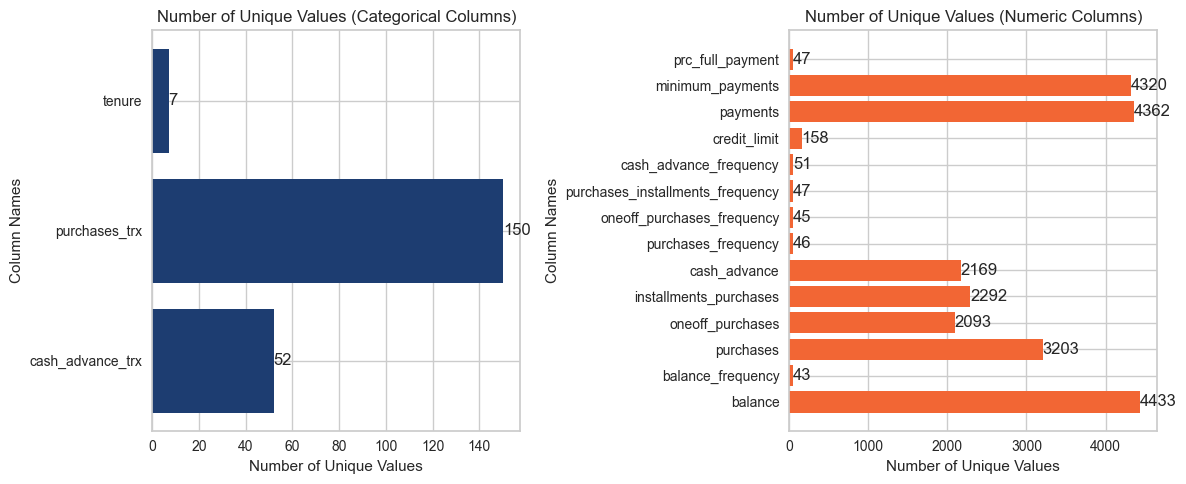

In [19]:
a = int_col.nunique()
b = flt_col.nunique()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
bars1 = plt.barh(int_col.columns, a, color='#1D3D71')  # Menggunakan columns dari int_col sebagai label sumbu y
plt.title('Number of Unique Values (Categorical Columns)')
plt.xlabel('Number of Unique Values')
plt.ylabel('Column Names')

# Menambahkan nilai y pada grafik batang
for bar, count in zip(bars1, a):
    plt.text(count, bar.get_y() + bar.get_height() / 2, str(count), va='center')

plt.subplot(1, 2, 2)
bars2 = plt.barh(flt_col.columns, b, color='#F26634')  # Menggunakan columns dari flt_col sebagai label sumbu y
plt.title('Number of Unique Values (Numeric Columns)')
plt.xlabel('Number of Unique Values')
plt.ylabel('Column Names')

# Menambahkan nilai y pada grafik batang
for bar, count in zip(bars2, b):
    plt.text(count, bar.get_y() + bar.get_height() / 2, str(count), va='center')

plt.tight_layout()
plt.show()

**Highlights**  
Saya akan fokus ke Bar Chart Biru (Interger):
* Kolom Tenure atau Tenor dalam Bahasa Indonesia memiliki 7 nilai unik, dan satu-satunya yang termasuk low cardinality. Kolom ini mungkin bisa mencerminkan segmentasi nasabag.  
* purchase_trx memiliki 150 nilai unik, menunjukkan variasi transaksi pembelian yang lebih tinggi dan lebih bervariasi.
* Kolom Cash Advance Trx memiliki 52 nilai unik, artinya jumlah penarikan tunai variasinya lebih sedikit dibandingkan transaksi pembelian. Hal ini mungkin karena fee transaksi kartu kredit memang lebih tinggi.  
* Kolom Customer ID jumlahnya sebesar jumlah instance pada dataset. Artinya setiap instance/baris mewakili 1 customer/nasabah  

Bar Chart Merah (float) memiliki cardinality yang tinggi. Dimana jumlah balance setiap customer memang bisa berbeda satu sama lain, begitupun minimum paymentnya.

# Exploratory Data Analysis (EDA)

## Deskripsi Umum Dataset

In [20]:
df2.describe().transpose()

count         mean          std   min  \
balance                           4475.0  1563.205717  2072.045789   0.0   
balance_frequency                 4475.0     0.876933     0.238222   0.0   
purchases                         4475.0  1003.251343  2060.034730   0.0   
oneoff_purchases                  4475.0   596.369893  1653.425984   0.0   
installments_purchases            4475.0   407.110215   880.799744   0.0   
cash_advance                      4475.0   984.288554  2060.448056   0.0   
purchases_frequency               4475.0     0.490579     0.402907   0.0   
oneoff_purchases_frequency        4475.0     0.202301     0.298203   0.0   
purchases_installments_frequency  4475.0     0.363886     0.397603   0.0   
cash_advance_frequency            4475.0     0.136132     0.201036   0.0   
cash_advance_trx                  4475.0     3.301229     7.134727   0.0   
purchases_trx                     4475.0    14.929162    25.540814   0.0   
credit_limit                      4475.0  4494.878630  3609.267706  50.0   
payments                          4475.0  1740.075430  2827.633858   0.0   
minimum_payments                  4475.0   843.704936  2399.621735   0.0   
prc_full_payment                  4475.0     0.150224     0.289081   0.0   
tenure                            4475.0    11.518212     1.328925   6.0   

                                          25%          50%          75%  \
balance                            124.432849   871.355430  2047.570799   
balance_frequency                    0.888889     1.000000     1.000000   
purchases                           39.560000   360.000000  1102.420000   
oneoff_purchases                     0.000000    45.650000   575.220000   
installments_purchases               0.000000    88.620000   455.885000   
cash_advance                         0.000000     0.000000  1138.887754   
purchases_frequency                  0.083333     0.500000     0.916667   
oneoff_purchases_frequency           0.000000     0.083333     0.250000   
purchases_installments_frequency     0.000000     0.166667     0.750000   
cash_advance_frequency               0.000000     0.000000     0.250000   
cash_advance_trx                     0.000000     0.000000     4.000000   
purchases_trx                        1.000000     7.000000    17.000000   
credit_limit                      1600.000000  3000.000000  6500.000000   
payments                           376.913051   877.494612  1911.596530   
minimum_payments                   162.761527   290.977264   785.953474   
prc_full_payment                     0.000000     0.000000     0.125000   
tenure                              12.000000    12.000000    12.000000   

                                          max  
balance                           18495.55855  
balance_frequency                     1.00000  
purchases                         41050.40000  
oneoff_purchases                  40624.06000  
installments_purchases            14686.10000  
cash_advance                      47137.21176  
purchases_frequency                   1.00000  
oneoff_purchases_frequency            1.00000  
purchases_installments_frequency      1.00000  
cash_advance_frequency                1.50000  
cash_advance_trx                    123.00000  
purchases_trx                       347.00000  
credit_limit                      30000.00000  
payments                          50721.48336  
minimum_payments                  76406.20752  
prc_full_payment                      1.00000  
tenure                               12.00000

balance: Rata-rata saldo nasabah adalah 1563.21 dengan standar deviasi yang besar (2072.05). Ini memunjukkan variasi saldo cukup jaug antar nasabah, dari 0 hingga 18495.56.  

purchases: Rata-rata pembelian adalah 1003.25, variasi juga tinggi dimana standar deviasi 2060.03. Perbedaan yang signifikan antar nasbah sangat terlihat.  

credit_limit: Rata-rata limit kredit adalah 4494.88. Terlihat limit kredit disesuaikan setiap nasabah.  

## Cek Distribusi data

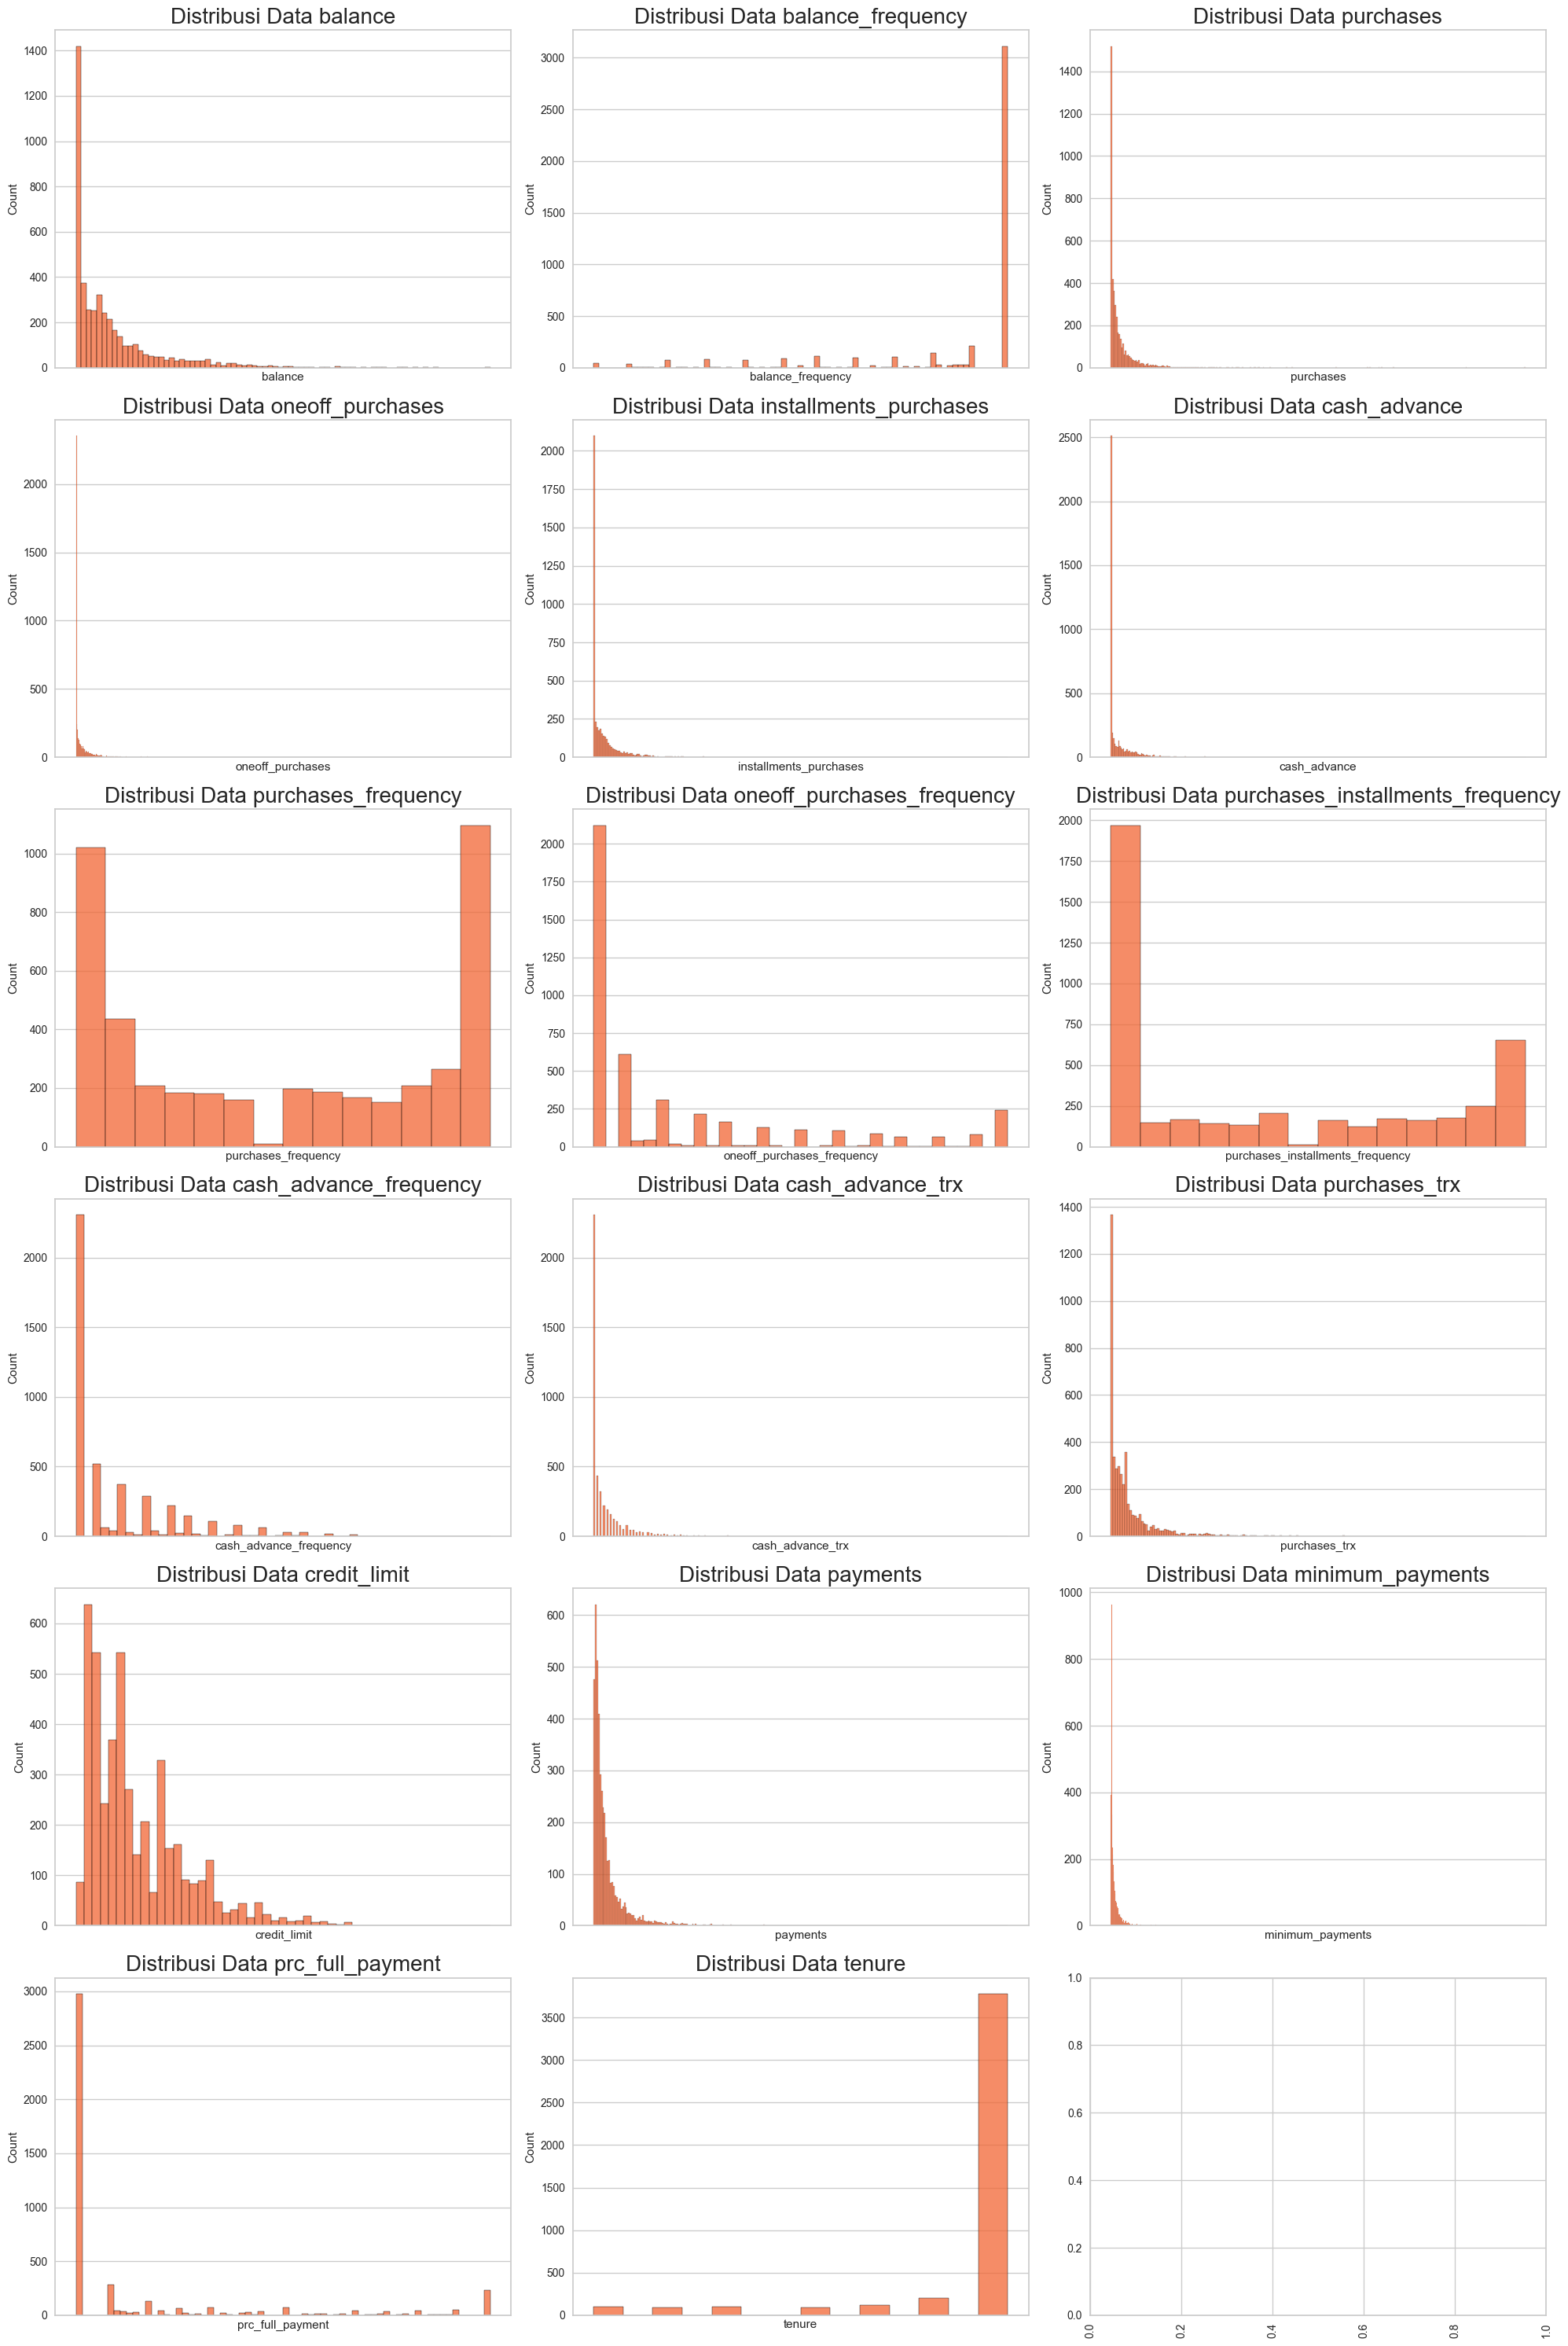

In [21]:
fig, axes = plt.subplots(6, 3, figsize=(20, 5 * 6))

for i, col in enumerate(df2.columns):
    ax = axes[i // 3, i % 3] 
    sns.histplot(data=df2, x=col, color='#F26634', ax=ax)
    ax.set_title(f'Distribusi Data {col}', size= 20)
    ax.set_xlabel(col)
    
    ax.set_xticks([])
    ax.set_xticklabels([])

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Nampaknya semua kolom tidak terdistribusi secara normal. Ada yang skew ke kanan, kiri, ada juga yang bimodal seperti kolom data_purchase_frequency. Saya akan memikirkan untuk menggunakan Robust Scaler pada tahapan Feature Engineering.

## Analisa Nasabah Berdasarkan Tenure

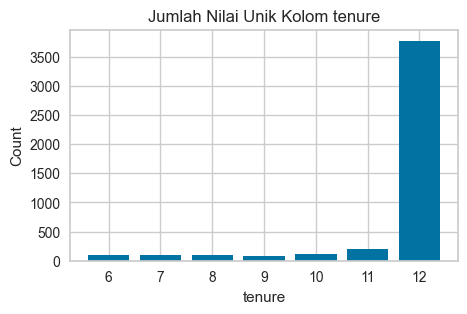

In [22]:
tenure_unique= int_col['tenure'].value_counts()
plt.figure(figsize=(5, 3))
plt.bar(tenure_unique.index, tenure_unique.values)
plt.xlabel('tenure')
plt.ylabel('Count')
plt.title('Jumlah Nilai Unik Kolom tenure')
plt.show()

Data unik ini mewakili berapa kali sebuah installment dilakuka. Mulai dari 6 - 12 bulan. Tenure didominasi dengan jangka waktu 12 bulan. Artinya sebagian besar yang melakukan transaksi dengan cicilan mengambil tenor terlama ini

## Hubungan Tenure dengan Transaksi dan Kredit

### Dari Sudut Pandang Transaksi

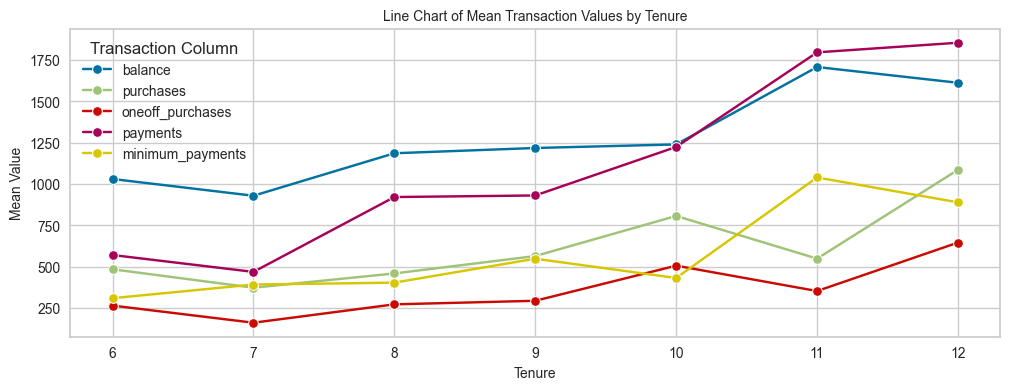

In [23]:
Transaction_columns = ['balance', 'purchases', 'oneoff_purchases', 'payments', 'minimum_payments']

# Mengelompokkan data berdasarkan kolom 'tenure' dan menghitung rata-rata pada kolom uang
Transaction_avg_by_tenure = df2.groupby('tenure')[Transaction_columns].mean()

Transaction_avg_by_tenure = df2.groupby('tenure')[Transaction_columns].mean().reset_index()

# Membentuk data dalam format panjang (tidy data) untuk digunakan dalam scatter plot
Transaction_avg_by_tenure_long = Transaction_avg_by_tenure.melt(id_vars=['tenure'], var_name='Transaction_column', value_name='mean_value')

# Membuat scatter plot
plt.figure(figsize=(12, 4))
sns.lineplot(data=Transaction_avg_by_tenure_long, x='tenure', y='mean_value', hue='Transaction_column', color= color_codes, marker='o')
plt.title('Line Chart of Mean Transaction Values by Tenure', fontsize=10)
plt.xlabel('Tenure', fontsize=10)
plt.ylabel('Mean Value', fontsize=10)
plt.legend(title='Transaction Column', fontsize=10)
plt.show()

**Highlights**  
balance: Terlihat seperti ada ecenderungan peningkatan saldo rata-rata seiring dengan bertambahnya tenure.  
purchases: Pembelian rata-rata juga menunjukkan peningkatan bersamaan dengan tenure.  
Begitupun 3 kolom lainnya meningkat seiring peningkatan tenure.

### Dari Sudut Pandang Pinjaman

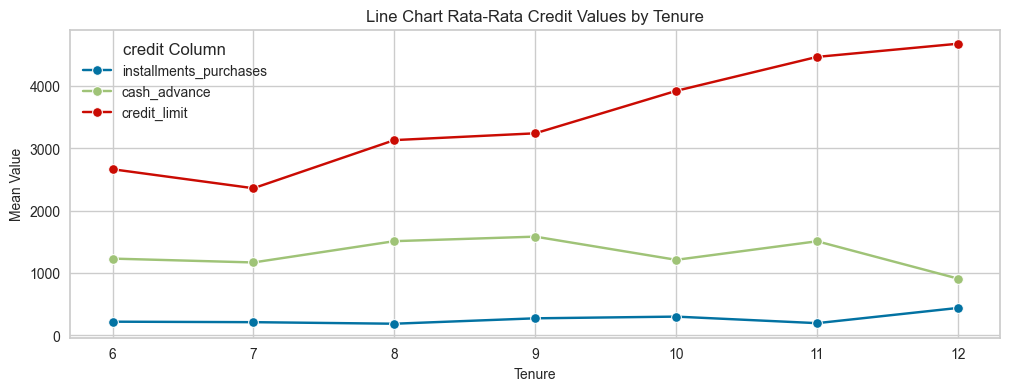

In [24]:

credit_columns= ['installments_purchases', 'cash_advance', 'credit_limit']

# Mengelompokkan data berdasarkan kolom 'tenure' dan menghitung rata-rata pada kolom uang
credit_avg_by_tenure = df2.groupby('tenure')[credit_columns].mean()

credit_avg_by_tenure = df2.groupby('tenure')[credit_columns].mean().reset_index()

# Membentuk data dalam format panjang (tidy data) untuk digunakan dalam scatter plot
credit_avg_by_tenure_long = credit_avg_by_tenure.melt(id_vars=['tenure'], var_name='credit_column', value_name='mean_value')

# Membuat scatter plot
plt.figure(figsize=(12, 4))
sns.lineplot(data=credit_avg_by_tenure_long, x='tenure', y='mean_value', hue='credit_column', color= color_codes, marker='o')
plt.title('Line Chart Rata-Rata Credit Values by Tenure', fontsize= 12)
plt.xlabel('Tenure', fontsize=10)
plt.ylabel('Mean Value', fontsize=10)
plt.legend(title='credit Column', fontsize=10)
plt.show()

Berbeda dengan grafik sebelumnya, kali ini hanya credit_limit yang inline berkorelasi dengan tenure. Dua kolom lainnya cenderung sideways.

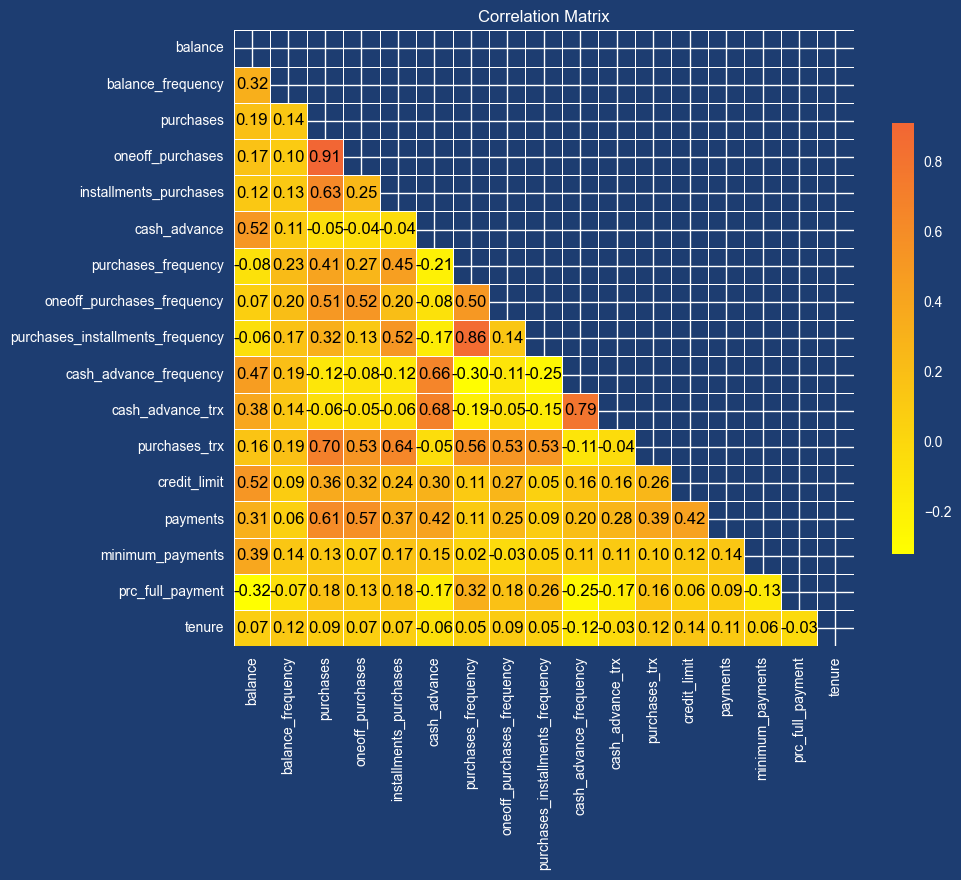

In [25]:
correlation_matrix = df2.corr()
colors = ["yellow", "#F26634"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(10, 8), facecolor= "#1D3D71")
sns.set_style("darkgrid")  # Mengatur tema warna menjadi gelap
ax = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=.5, mask=mask,
                 cmap=cmap, cbar_kws={"shrink": 0.7})  
ax.set_facecolor('#1D3D71')

# Menambahkan judul dan mengatur label sumbu x dan y
plt.title('Correlation Matrix', color='white', fontsize= 12)

# Mengatur warna label sumbu x dan y dan ticks
ax.set_xlabel(ax.get_xlabel(), color='white', fontweight='bold')
ax.set_ylabel(ax.get_ylabel(), color='white', fontweight='bold')

# Mengatur warna tick labels pada sumbu x dan y
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
colorbar = ax.collections[0].colorbar

# Atur warna teks yticklabels pada colorbar menjadi putih
colorbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(colorbar.ax.axes, 'yticklabels'), color='white')

for text in ax.texts:
    text.set_color('black')

plt.show()

Terlihat oneoff_purchase berkorelasi dengan purchases. Begitupun antara purchase_installment_frequency dengan purchase_frequency. Artinya sebenarnya ada yang bisa dihapus karena memiliki korelasi satu sama lain. Tetapi ini bisa ditangani dengan baik oleh PCA

## Cek Outliers

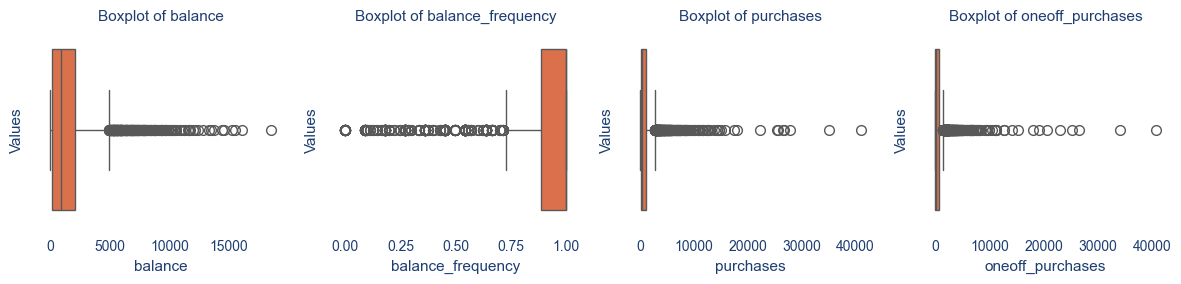

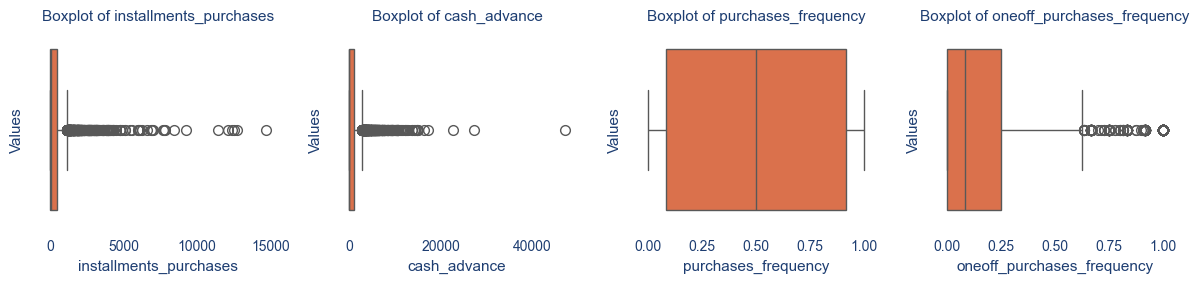

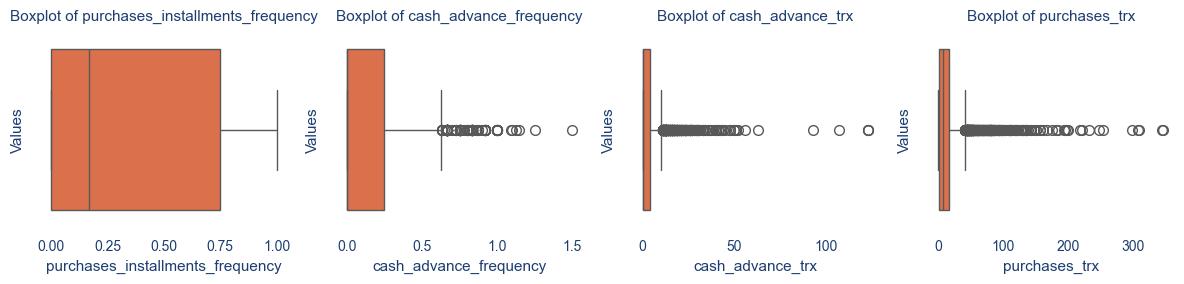

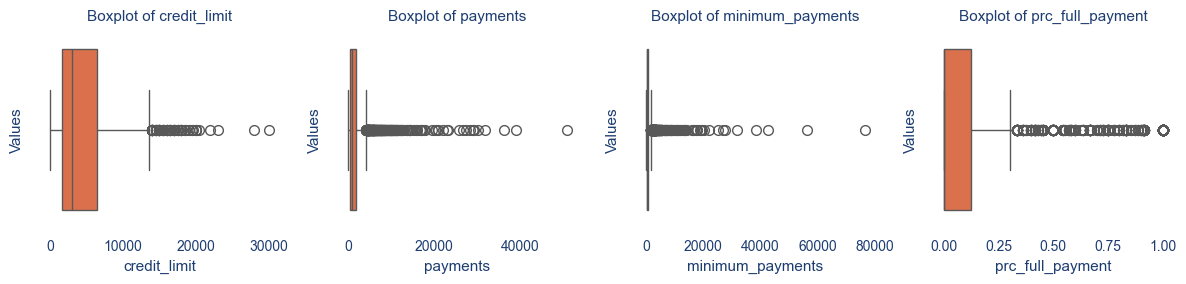

In [26]:
for i in range(0, 16, 4):
    cols = df2.columns[i:i+4] 

    # Create a figure with 3 subplots
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))

    for j, kolom in enumerate(cols):
        sns.boxplot(x=df2[kolom], ax=axs[j], color='#F26634')
        axs[j].set_facecolor('white')
        axs[j].set_title(f'Boxplot of {kolom}', color='#1D3D71', fontsize=11)
        axs[j].set_xlabel(kolom, color='#1D3D71')
        axs[j].set_ylabel('Values', color='#1D3D71')
        axs[j].tick_params(colors='#1D3D71')

    plt.tight_layout()
    plt.show()

Outliers sangat jelas terlihat hampir di setiap kolom dan cenderung extreme. Outliers tersebut harus dihapus karena akan menyebabkan bias pada tahapan modelling. Tetapi, ada beberapa kolom yang menurut saya natural sehingga tidak perlu dihapus. 

## Remove Outliers

In [27]:
def outliers(df1):
    columns_to_keep_outliers = ['cust_id', 'purchases_frequency', 'purchases_installments_frequency', 'tenure']

    for col in df1.columns:
        if col not in columns_to_keep_outliers:
            Q1 = df1[col].quantile(0.25)
            Q3 = df1[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
        
    return df1

df1 = outliers(df1)
df2 = df1.drop('cust_id', axis=1)
df2.shape


(1198, 17)

Outliers dihapus pada treshold 1.5 dari IQR. Berikut adalah visualisasinya.

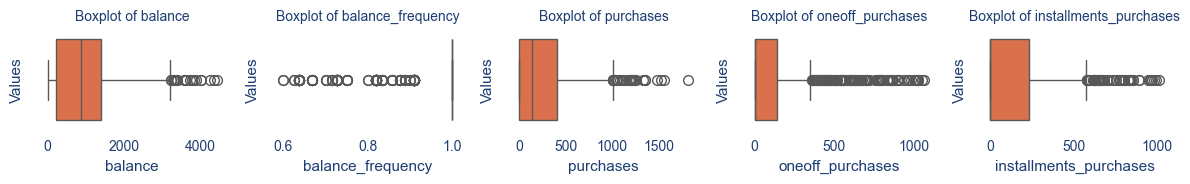

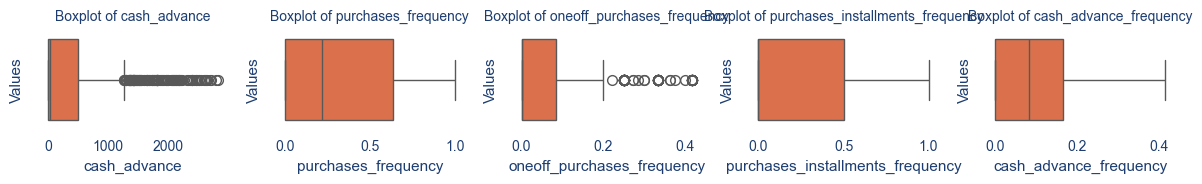

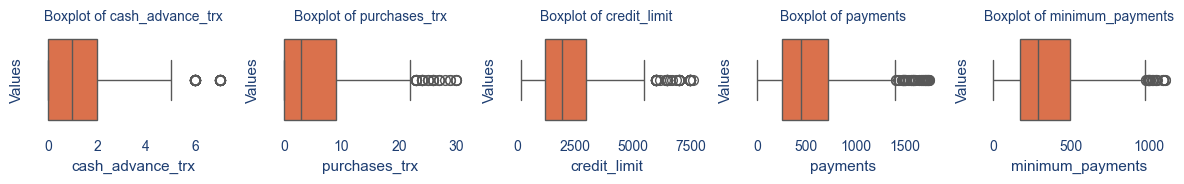

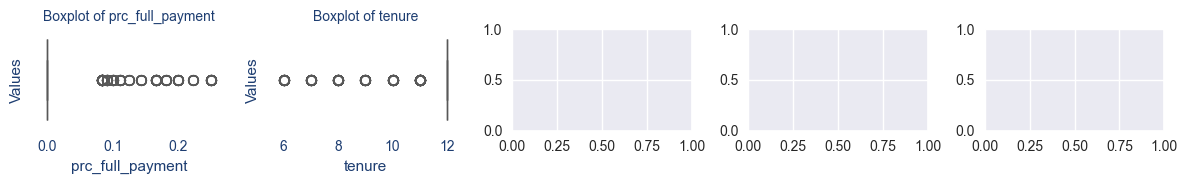

In [28]:
for i in range(0, 17, 5):
    cols = df2.columns[i:i+5] 

    # Create a figure with 3 subplots
    fig, axs = plt.subplots(1, 5, figsize=(12, 2))

    for j, kolom in enumerate(cols):
        sns.boxplot(x=df1[kolom], ax=axs[j], color='#F26634')
        axs[j].set_facecolor('white')
        axs[j].set_title(f'Boxplot of {kolom}', color='#1D3D71', fontsize=10)
        axs[j].set_xlabel(kolom, color='#1D3D71')
        axs[j].set_ylabel('Values', color='#1D3D71')
        axs[j].tick_params(colors='#1D3D71')

    plt.tight_layout()
    plt.show()

Terlihat outliers masih tersisa. Maka saya akan menggunakan metode robust scaling. Mengigat distribusi data juga tidak merata

# Feature Engineering

## Scaling Data

Saya akan mulai dengan scaling data menggunakan metode robust scaling dengan alasan yang sudah saya sebutkan di atas. dan langsung mentransformasikannya dengan metode PCA

In [29]:

# Feature scaling menggunakan Robust Scaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df2)

# Dimensionality Reduction using PCA
pca = PCA()
pca.fit(df_scaled)


PCA()

## Eigenvalues

Sekarang saya akan memvisualisasikan hasil PCA di atas dengan grafik Eigenvalues

Text(0, 0.5, 'Eigenvalues')

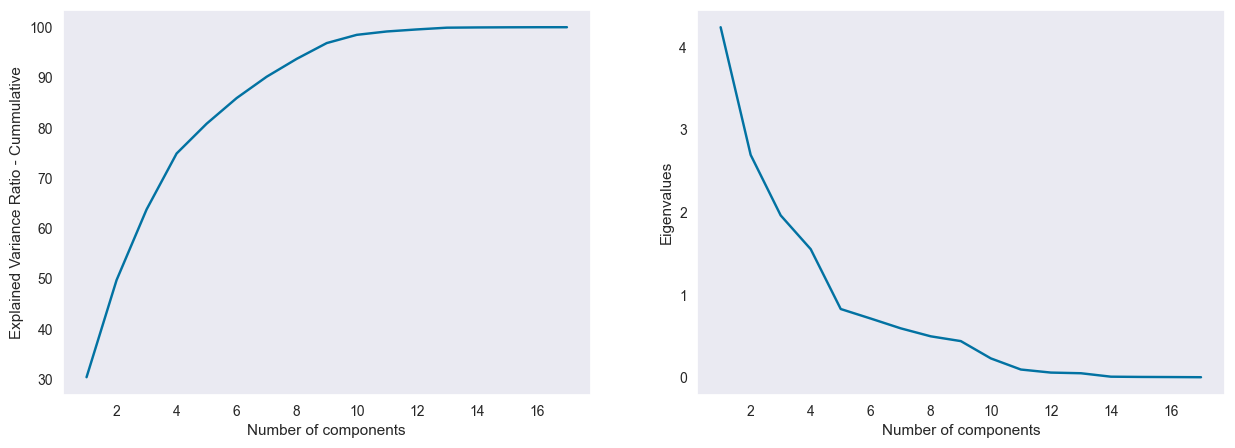

In [30]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Dari chart di atas, 3-4 komponen pertama  memiliki nilai eigen di atas 1. Setelah itu garis mulai melandai.  

## Variance Ratio

Saya akan menetapkan mempertahankan 95% informasi

In [31]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
print(f"Jumlah fitur jika kita ingin mempertahankan inforamsi utama sebanyak 95% adalah sebanyak {num_features} Fitur")

Jumlah fitur jika kita ingin mempertahankan inforamsi utama sebanyak 95% adalah sebanyak 9 Fitur


Disebutkan bahwa fitur utama ternyata mencapai 9 fiture dengan 95% informasi utama yang dipertahankan. 

In [32]:
# Let's train the model with 95 % of the original dataset information

pca = PCA(n_components=0.95)
pca.fit(df_scaled)

df_scaled_pca = pca.transform(df_scaled)

# Model Evaluation

## Elbow Method

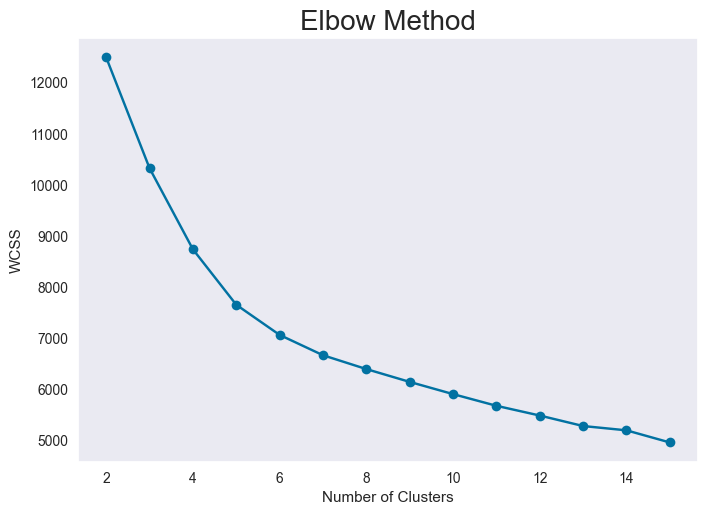

In [33]:
wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Sedikit sulit menentukan jumlah cluster berdasarkan chart di atas. Saya akan menggunakan metode lain

## Silhoutte Plot & Silhoutte Score

In [34]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

### Display the Silhouette Score and Plot Silhouette Plot


For n_clusters = 2 The average silhouette_score is : 0.30700663717799576
For n_clusters = 3 The average silhouette_score is : 0.20778097056659223
For n_clusters = 4 The average silhouette_score is : 0.23198753180153492
For n_clusters = 5 The average silhouette_score is : 0.2226359684910824
For n_clusters = 6 The average silhouette_score is : 0.22001602097094414
For n_clusters = 7 The average silhouette_score is : 0.19303317330813508
For n_clusters = 8 The average silhouette_score is : 0.19580970988745316
For n_clusters = 9 The average silhouette_score is : 0.1811611519237469
For n_clusters = 10 The average silhouette_score is : 0.19676492290509187
For n_clusters = 11 The average silhouette_score is : 0.19013766916199504
For n_clusters = 12 The average silhouette_score is : 0.17561383520177812
For n_clusters = 13 The average silhouette_score is : 0.17732649184457489
For n_clusters = 14 The average silhouette_score is : 0.16510679486423632


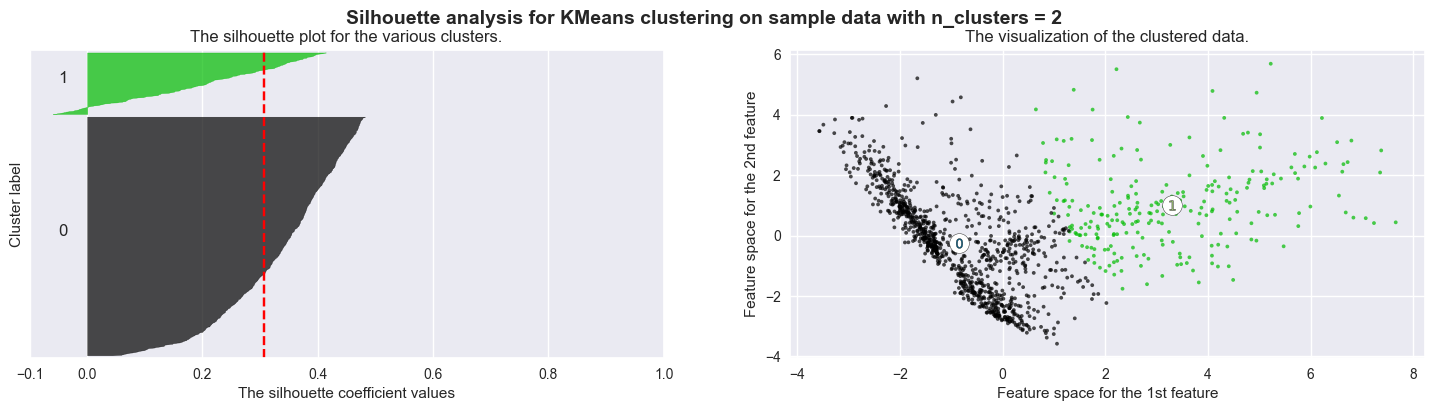

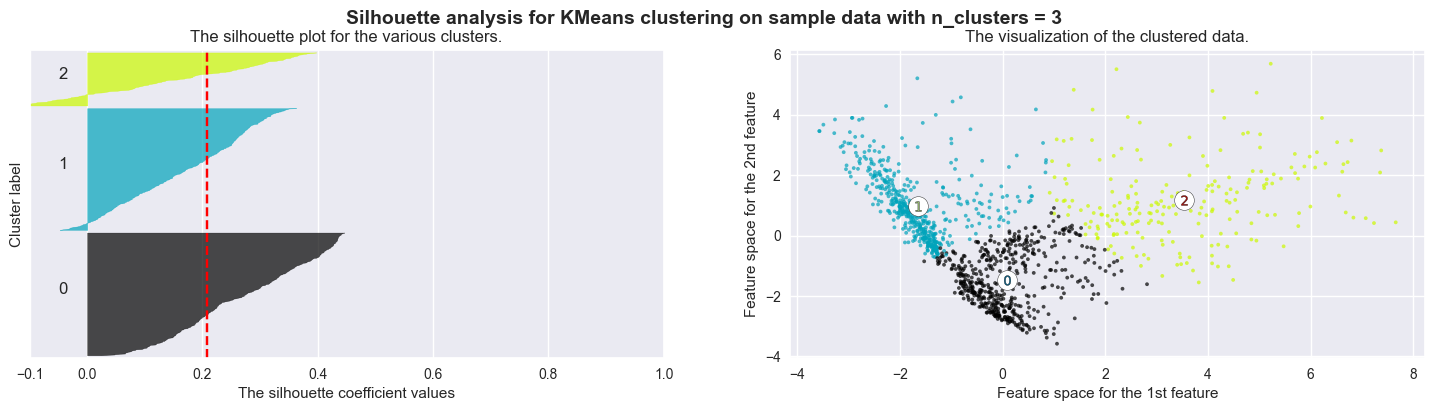

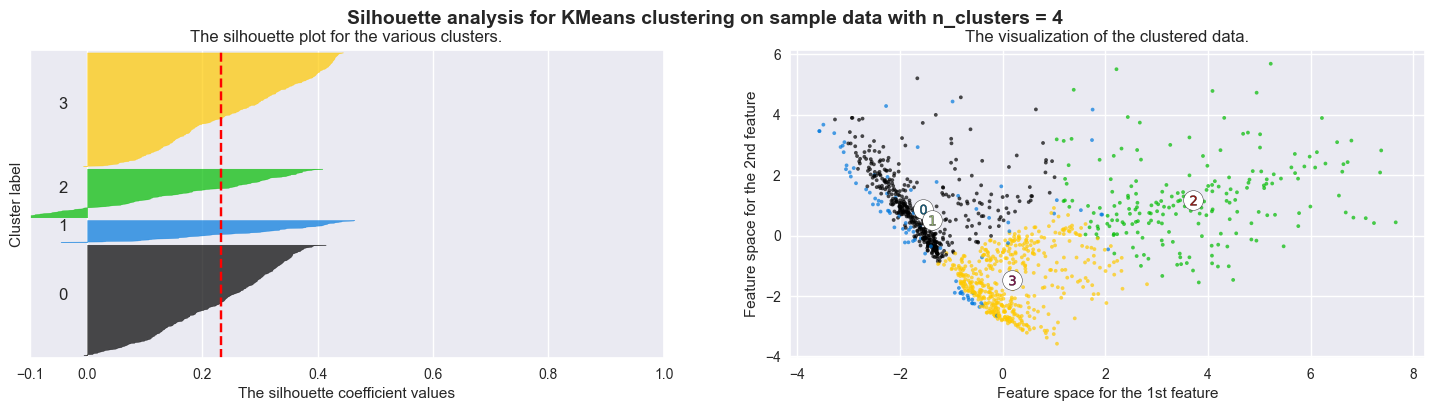

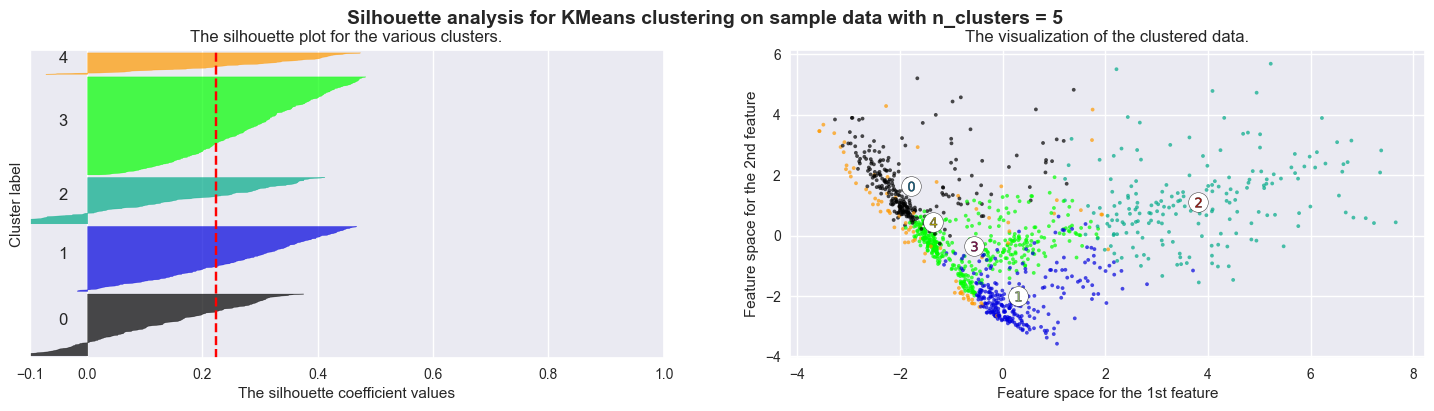

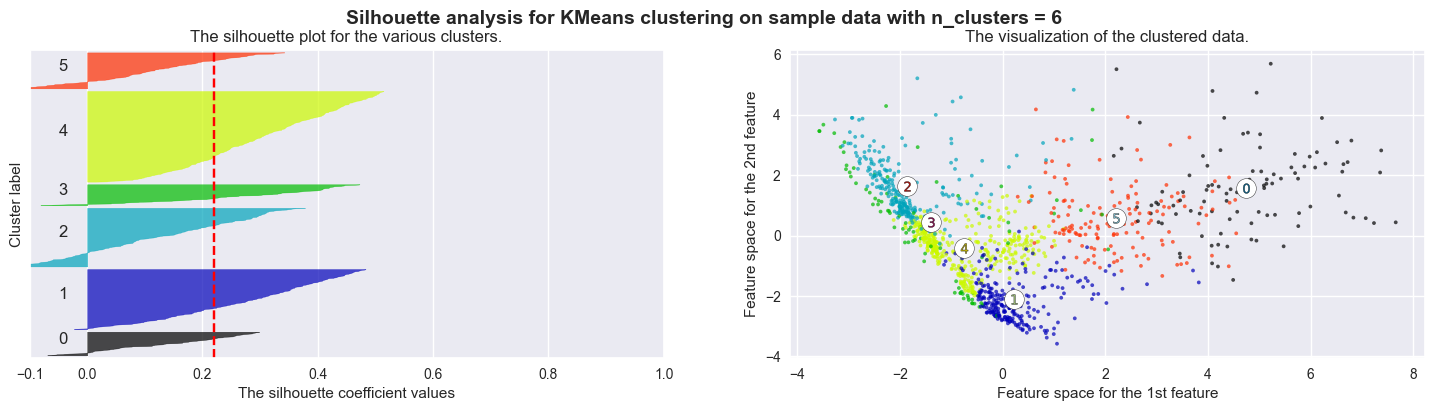

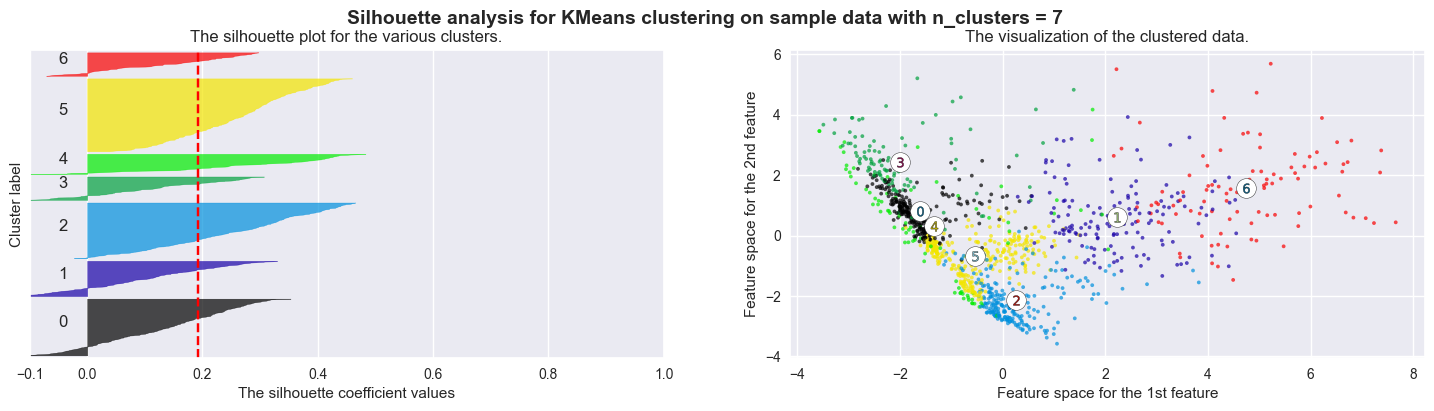

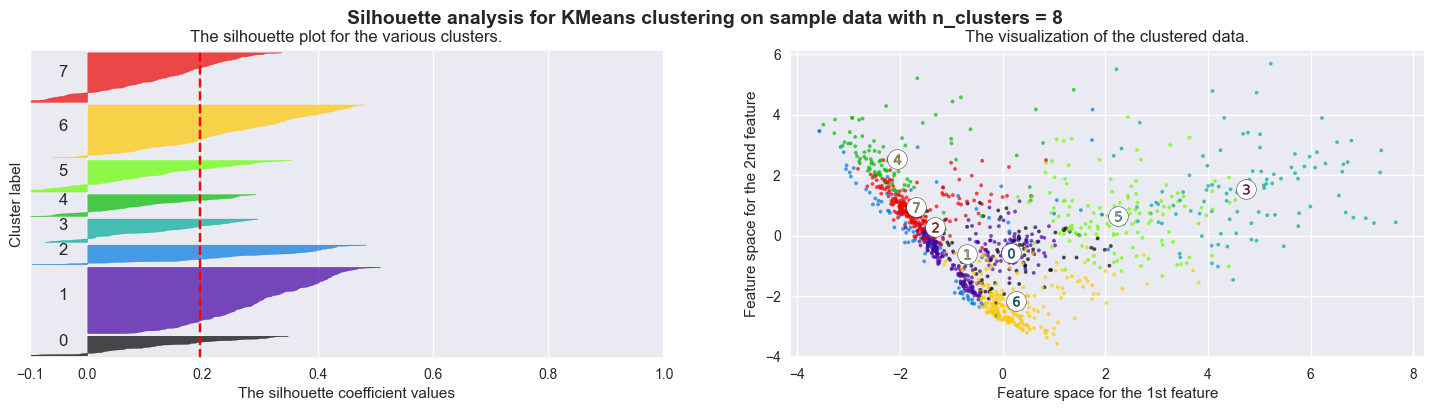

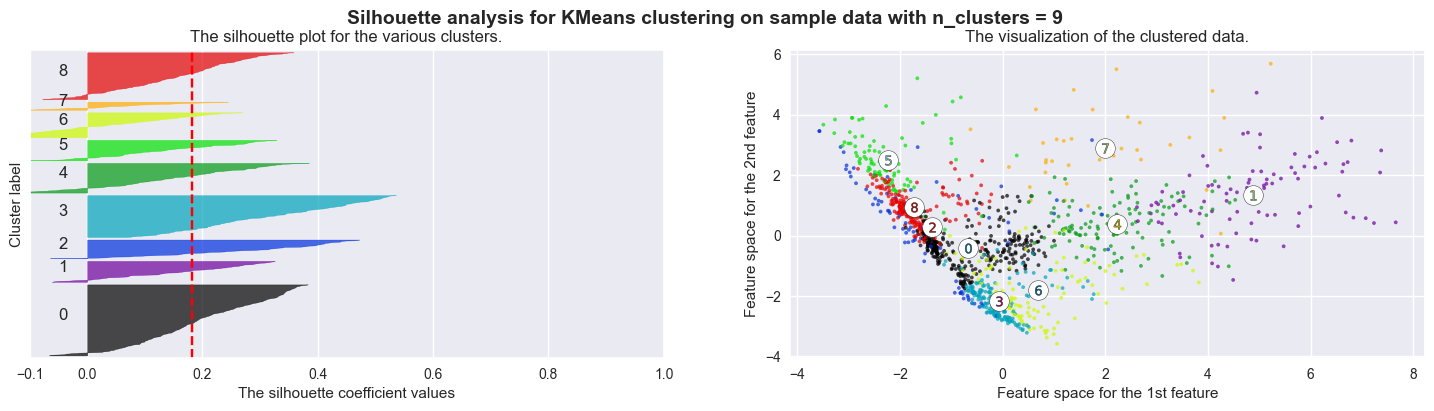

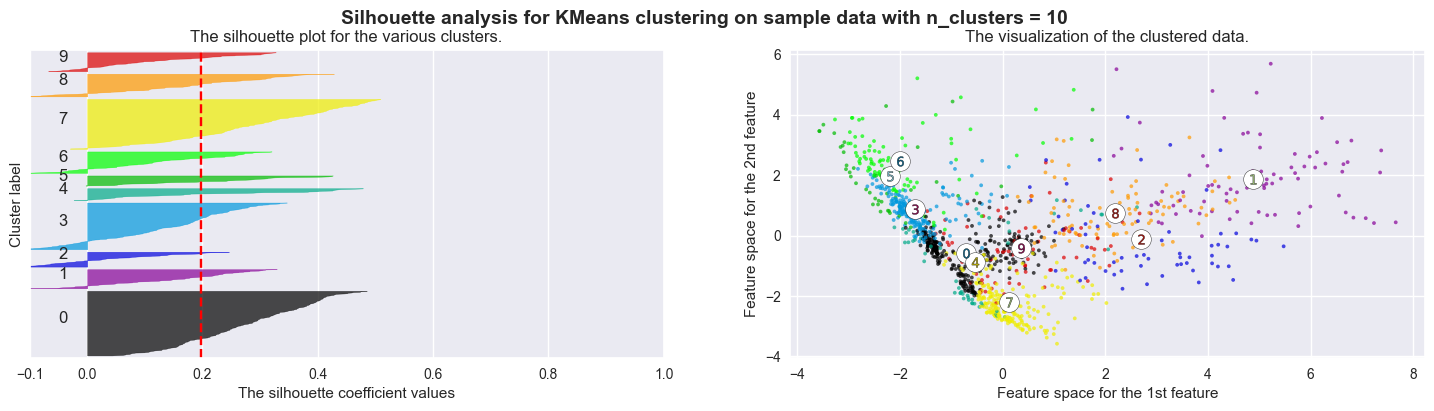

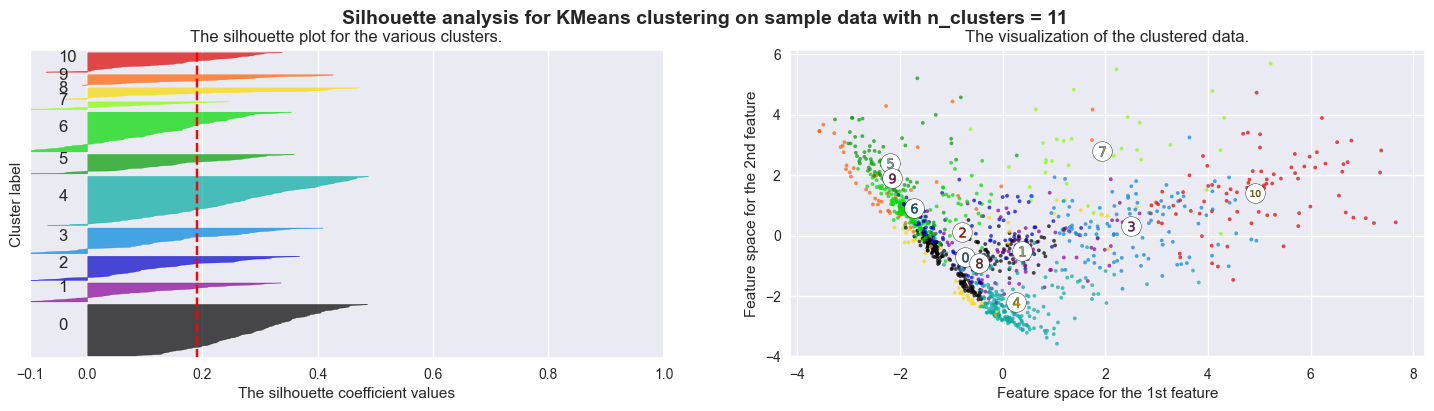

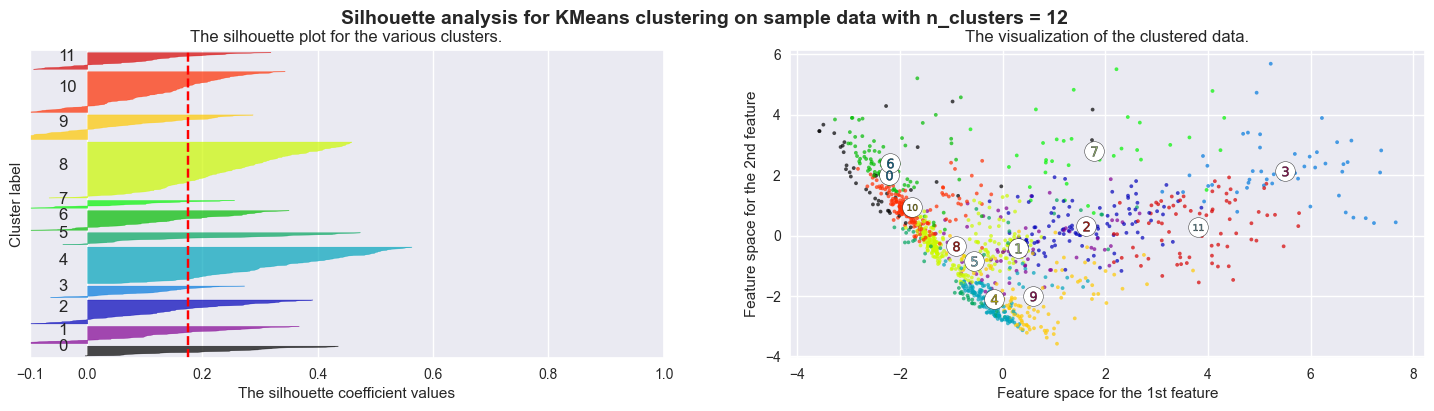

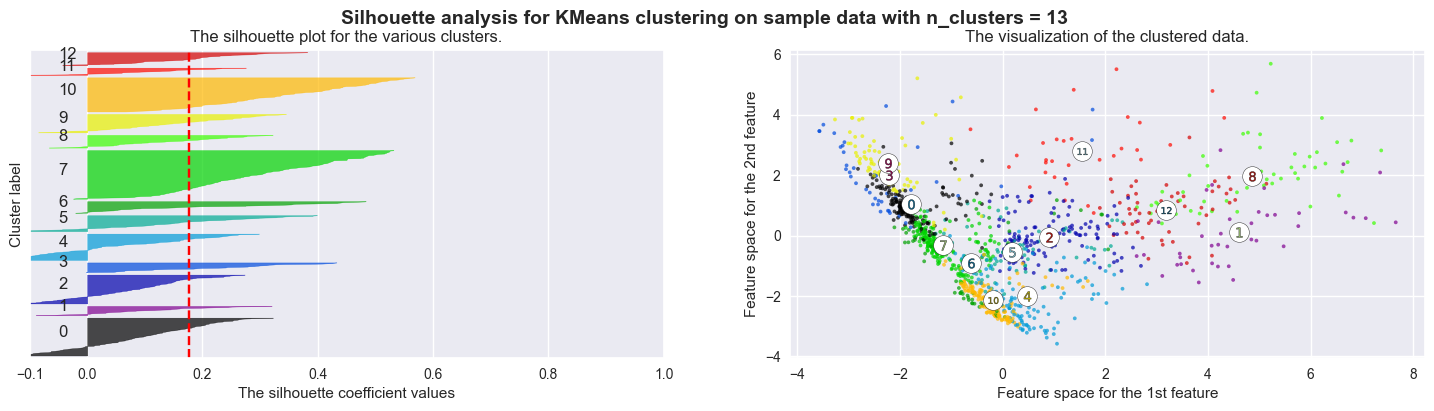

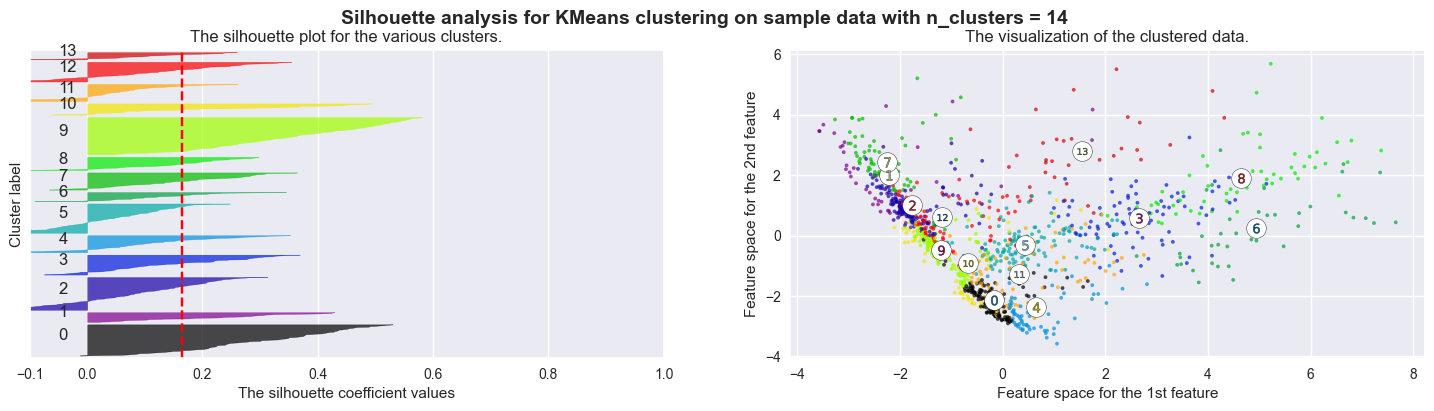

In [35]:
plot_silhouette(range(2, max_cluster),df_scaled_pca, random_state)

Secara angka jelas cluster 2 selalu lebih tinggi. Tetapi jika dilihat visualisasinya dan score. Menurut saya 3 paling representatif dengan tidak adanya titik yang saling tumpang tindih. Saya akan lanjut cek dengan metode terakhir.

### Yelowbrick

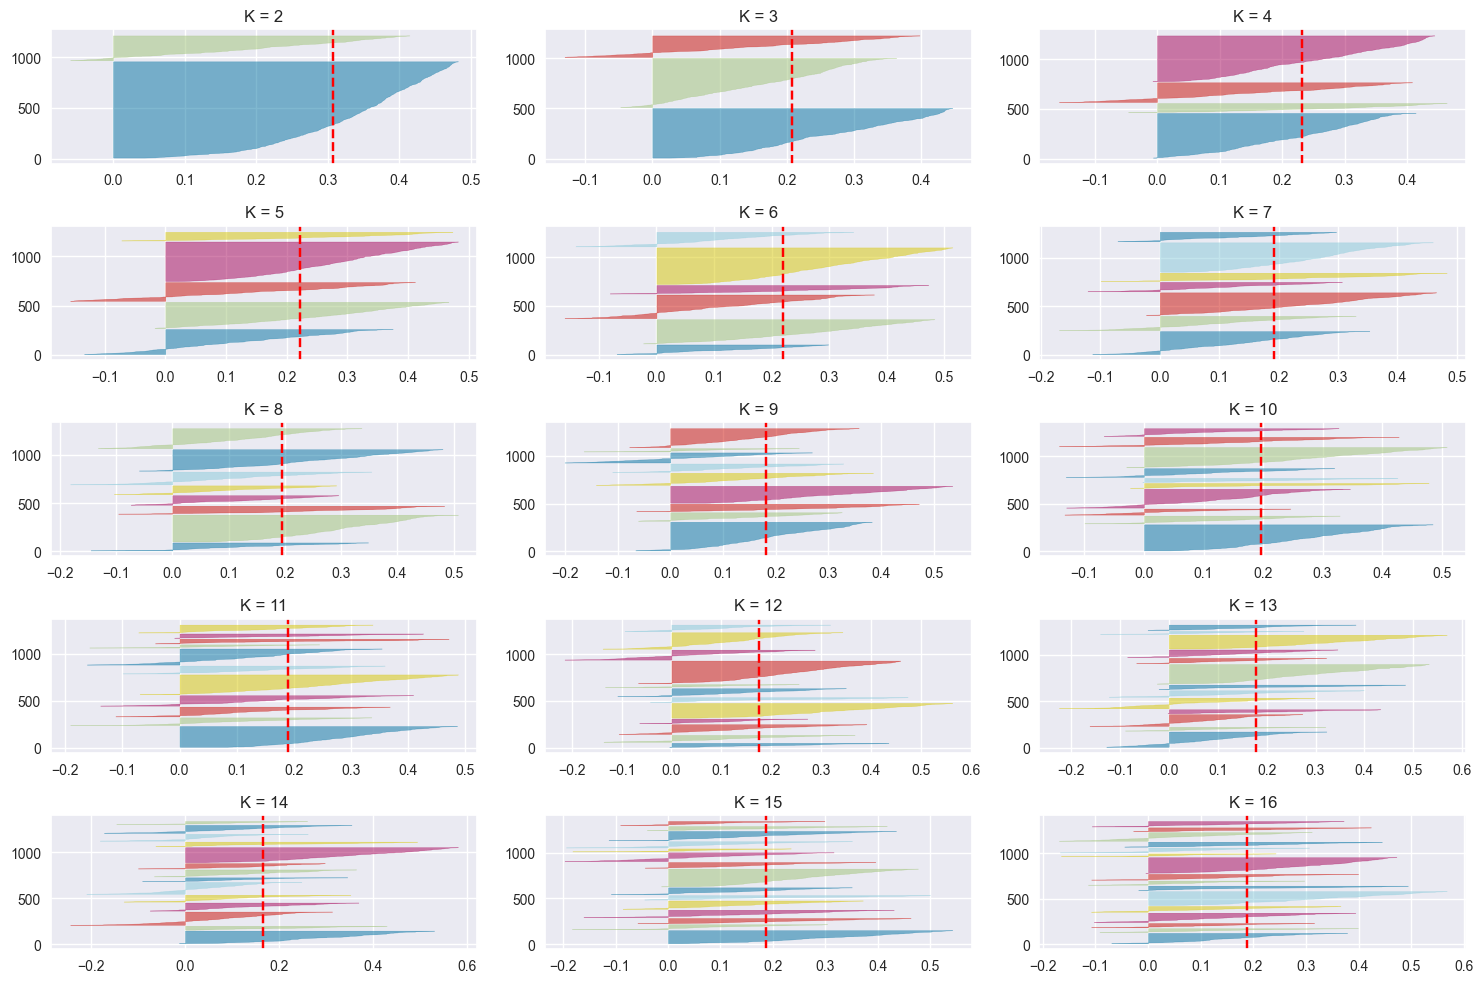

In [36]:
fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(df_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Grafik di atas juga menguatkan asumsi saya untuk memilih cluster 3. setiap cluster melewati garis rata-rata silhouette score.

# Model Definition & Model Training

Kali ini saya menggabungkan Model Definition dengan Model Training. Itu karena evaluasi dilakukan untuk mentukan jumlah cluster yang tepat untuk data.  

Saya mulai melakukan training pada data asli df1 dimana masih ada kolom cust_id. Saya menggunakan 3 cluster berdasarkan hasil evaluasi di atas.

In [37]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(df_scaled_pca)
pred

df1['cluster'] = pred
df1['cluster'] = df1['cluster'].replace({0: 1, 1: 2, 2: 3})

df1


cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
4        7755   440.613643           1.000000     600.00            600.00   
5        8299   611.561026           1.000000     765.00            765.00   
9          91   559.151424           1.000000      94.00             94.00   
10        131    63.078242           1.000000     114.00              0.00   
12        301     4.054657           0.727273     264.02            264.02   
...       ...          ...                ...        ...               ...   
4454     8037   617.413726           1.000000       0.00              0.00   
4455     8467  2433.487018           1.000000       0.00              0.00   
4462     5471   449.123098           1.000000      65.00             65.00   
4464     8237  1162.054399           0.909091     265.18            154.90   
4466     7211  1135.703750           1.000000      92.07              0.00   

      installments_purchases  cash_advance  purchases_frequency  \
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
9                       0.00      0.000000             0.250000   
10                    114.00      0.000000             0.250000   
12                      0.00      0.000000             0.250000   
...                      ...           ...                  ...   
4454                    0.00   1420.758241             0.000000   
4455                    0.00    348.296735             0.000000   
4462                    0.00    354.816958             0.090909   
4464                  110.28   1216.254910             0.454545   
4466                   92.07     81.509491             0.272727   

      oneoff_purchases_frequency  purchases_installments_frequency  \
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
9                       0.250000                          0.000000   
10                      0.000000                          0.250000   
12                      0.250000                          0.000000   
...                          ...                               ...   
4454                    0.000000                          0.000000   
4455                    0.000000                          0.000000   
4462                    0.090909                          0.000000   
4464                    0.090909                          0.272727   
4466                    0.000000                          0.181818   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
4                   0.000000                 0              1        1000.0   
5                   0.000000                 0              1        2000.0   
9                   0.000000                 0              3        5500.0   
10                  0.000000                 0              3        3000.0   
12                  0.000000                 0              4        7000.0   
...                      ...               ...            ...           ...   
4454                0.272727                 4              0        2000.0   
4455                0.272727                 6              0        2500.0   
4462                0.272727                 6              1        2500.0   
4464                0.272727                 7              7        1500.0   
4466                0.272727                 3              3        1200.0   

        payments  minimum_payments  prc_full_payment  tenure  cluster  
4     215.316424        137.846006          0.000000       8        3  
5     204.464151        146.352314          0.000000       8        3  
9     254.733329        218.279194          0.000000      12        1  
10    184.582486        136.782541          0.000000      12        1  
12    274.692435         55.272081          0.111111      12        3  
...          ...               ...        

Dataframe awal sudah dikembalikan, kini ditambah dengan satu fitur cluster dari 1-3

## Visualisasi PCA 2d

Berikut adalah gambaran visualisasi dari model yang baru saja dilatih.

<Axes: >

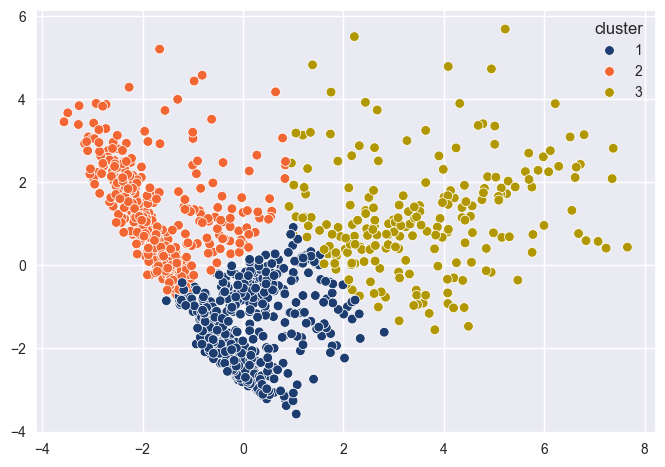

In [38]:
pca_2d = PCA(n_components=2)
pca_2d.fit(df_scaled)

df_scaled_pca_2d = pca_2d.fit_transform(df_scaled)

sns.scatterplot(x=df_scaled_pca_2d[:,0], y=df_scaled_pca_2d[:,1], hue=df1['cluster'], palette= color_codes)

# Model Saving

Saya simpan model ini dalam format .pkl

In [39]:
model_path = 'kmeans_model.pkl'
dump(km, model_path)

print(f"Model telah disimpan sebagai {model_path}")


Model telah disimpan sebagai kmeans_model.pkl


# Model Inference

## Membuat 15 baris baru

Saya akan memanfaatkan np.random dari tiap-tiap kolom kecuali cust_id. Sehingga datanya masih sesuai tipe asli dan masih di dalam range data asli

In [40]:
last_cust_id = df1['cust_id'].max()

# Buat 5 baris baru dengan nilai acak
min_values = df1.min()
max_values = df1.max()
new_rows = []
samples= 15
for _ in range(samples):
    new_row = {
        'cust_id': last_cust_id + 1,  # Menaikkan nilai cust_id
        'balance': np.random.uniform(min_values['balance'], max_values['balance']),
        'balance_frequency': np.random.uniform(min_values['balance_frequency'], max_values['balance_frequency']),
        'purchases': np.random.uniform(min_values['purchases'], max_values['purchases']),
        'oneoff_purchases': np.random.uniform(min_values['oneoff_purchases'], max_values['oneoff_purchases']),
        'installments_purchases': np.random.uniform(min_values['installments_purchases'], max_values['installments_purchases']),
        'cash_advance': np.random.uniform(min_values['cash_advance'], max_values['cash_advance']),
        'purchases_frequency': np.random.uniform(min_values['purchases_frequency'], max_values['purchases_frequency']),
        'oneoff_purchases_frequency': np.random.uniform(min_values['oneoff_purchases_frequency'], max_values['oneoff_purchases_frequency']),
        'purchases_installments_frequency': np.random.uniform(min_values['purchases_installments_frequency'], max_values['purchases_installments_frequency']),
        'cash_advance_frequency': np.random.uniform(min_values['cash_advance_frequency'], max_values['cash_advance_frequency']),
        'cash_advance_trx': np.random.randint(min_values['cash_advance_trx'], max_values['cash_advance_trx']),
        'purchases_trx': np.random.randint(min_values['purchases_trx'], max_values['purchases_trx']),
        'credit_limit': np.random.uniform(min_values['credit_limit'], max_values['credit_limit']),
        'payments': np.random.uniform(min_values['payments'], max_values['payments']),
        'minimum_payments': np.random.uniform(min_values['minimum_payments'], max_values['minimum_payments']),
        'prc_full_payment': np.random.uniform(min_values['prc_full_payment'], max_values['prc_full_payment']),
        'tenure': np.random.randint(min_values['tenure'], max_values['tenure'])
    }
    new_rows.append(new_row)

df_sample= pd.DataFrame(new_rows)



Data sudah digenerate. Sekarang saya drop kolom cust_id

In [41]:
df_sample_num= df_sample.drop('cust_id', axis=1)
df_sample_num

balance  balance_frequency    purchases  oneoff_purchases  \
0   2489.150539           0.716521   568.902293        626.775742   
1   4420.973374           0.692227  1462.433457        624.540247   
2   2908.312099           0.915946  1516.149419        148.448939   
3    270.680010           0.862774   986.074518        347.009074   
4    612.143297           0.681727  1630.097280        313.615797   
5   1333.675327           0.710708  1183.675396        977.440186   
6    464.909629           0.905423   492.932590        208.067308   
7    635.156037           0.845296   571.625656        322.227374   
8   2877.683323           0.974713   985.278629        476.338896   
9   2802.670369           0.887874   433.022701        519.716427   
10  2461.505017           0.819810   404.293601        383.003842   
11  2342.705485           0.846494   243.060947        542.016491   
12  2525.779063           0.702240  1165.415759        549.246090   
13   652.856770           0.948661  1421.954963        310.569072   
14  2630.166540           0.978433  1088.670997        334.656182   

    installments_purchases  cash_advance  purchases_frequency  \
0               211.554505   2207.962427             0.792126   
1               391.515712   1056.475655             0.702195   
2               239.061614    539.561536             0.025259   
3               908.471368   1610.374170             0.184719   
4               735.562441   2520.759656             0.834355   
5               911.397253   2397.771708             0.850552   
6               882.390891   2361.255569             0.572254   
7                73.683779   1944.612218             0.704119   
8               283.292725   1421.578168             0.315655   
9               774.726528   1544.433674             0.566981   
10              394.692401    152.905612             0.994791   
11              344.763063   1691.913681             0.549086   
12              114.912840   1285.662615             0.489992   
13              839.411497     83.181780             0.800513   
14              514.368948    927.698094             0.514368   

    oneoff_purchases_frequency  purchases_installments_frequency  \
0                     0.416104                          0.403892   
1                     0.020901                          0.802561   
2                     0.125355                          0.727114   
3                     0.360173                          0.277756   
4                     0.374211                          0.458031   
5                     0.301395                          0.770467   
6                     0.264446                          0.471230   
7                     0.379096                          0.827343   
8                     0.315142                          0.565320   
9                     0.004755                          0.682011   
10                    0.353309                          0.455961   
11                    0.228329                          0.330030   
12                    0.404454                          0.176839   
13                    0.009573                          0.291847   
14                    0.168029                          0.987962   

    cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                 0.119893                 2             29   6981.826883   
1                 0.025143                 6             19   1806.878142   
2                 0.208465                 3             18   1378.673363   
3                 0.405568                 1              4   6897.762709   
4                 0.007950                 3              0   7253.094914   
5                 0.200305                 6              4   1304.852110   
6                 0.254846                 4              4   3442.753627   
7                 0.117198                 0             27   3571.357149   
8                 0.366251                 2              9   5286.660472   
9  

## Prediksi Data Baru

Saya akan mencoba memprediksi data baru tanpa melakukan tahapan scaling dan PCA sebelumnya. Saya akan langsung fit model terhadap data baru ini tentubya dengan menggunakan cluster yang sama

In [42]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(df_sample_num)
pred

df_sample['cluster'] = pred
df_sample['cluster'] = df_sample['cluster'].replace({0: 1, 1: 2, 2: 3})



Data Baru sudah dibuat. Berikut komposisinya

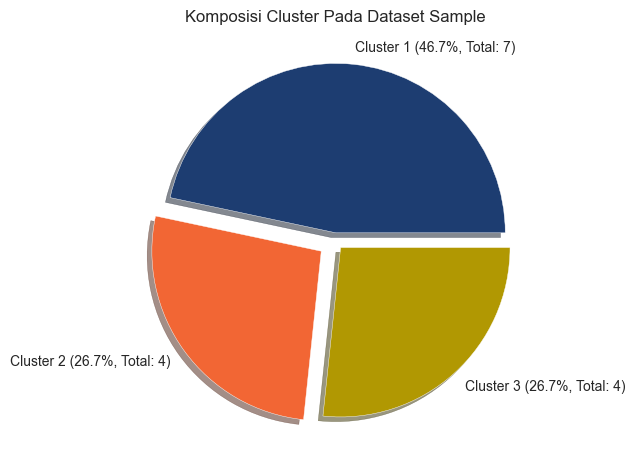

In [43]:

sample_c1 = df_sample[df_sample['cluster']== 1]
sample_c2 = df_sample[df_sample['cluster']== 2]
sample_c3 = df_sample[df_sample['cluster']== 3]

y = [len(sample_c1), len(sample_c2), len(sample_c3)]
mylabels = ["Cluster 1", "Cluster 2", "Cluster 3"]
percentages = [f'{(val / sum(y)) * 100:.1f}%' for val in y]
totals = [f'Total: {val}' for val in y]
labels_with_percentages_totals = [f'{label} ({percentage}, {total})' for label, percentage, total in zip(mylabels, percentages, totals)]
myexplode = [0.05, 0.1, 0.05]
colors = [color_codes[1], color_codes[2], color_codes[3]]

plt.pie(y, labels=labels_with_percentages_totals, explode=myexplode, shadow=True, colors=colors, pctdistance=0.85)
plt.title('Komposisi Cluster Pada Dataset Sample')
plt.show()


# Pengambilan Kesimpulan

## Exploratory Data Analysis (2nd EDA)

Saya akan menganalisa data kembali, kali ini dengan tambahan kolom informasi clustering dari model. Sebelumnya saya akan membuat variabel baru, group dataframe berdasarkan clusternya.

In [44]:
c1 = df1[df1['cluster']== 1]
c2 = df1[df1['cluster']== 2]
c3 = df1[df1['cluster']== 3]

### Komposisi Cluster

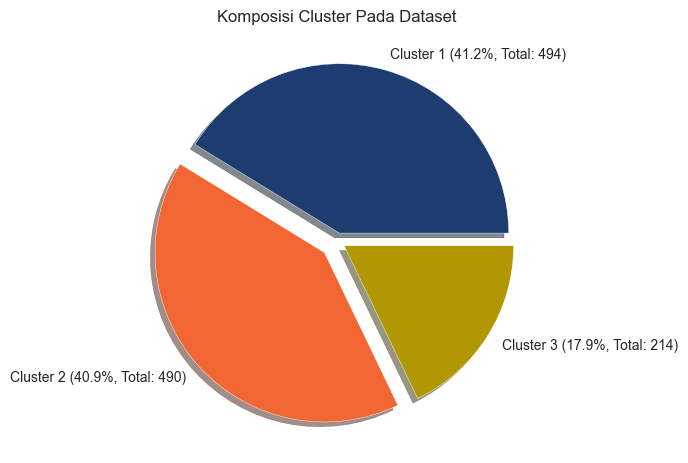

In [45]:
y = [len(c1), len(c2), len(c3)]
mylabels = ["Cluster 1", "Cluster 2", "Cluster 3"]
percentages = [f'{(val / sum(y)) * 100:.1f}%' for val in y]
totals = [f'Total: {val}' for val in y]
labels_with_percentages_totals = [f'{label} ({percentage}, {total})' for label, percentage, total in zip(mylabels, percentages, totals)]
myexplode = [0.05, 0.1, 0.05]
colors = [color_codes[1], color_codes[2], color_codes[3]]

plt.pie(y, labels=labels_with_percentages_totals, explode=myexplode, shadow=True, colors=colors, pctdistance=0.85)
plt.title('Komposisi Cluster Pada Dataset')
plt.show()


Dari Pie Chart di atasm terlihat cluster 1 mendominasi, disusul oleh cluster 2 dan terakhir 3. 

### Analisa Cluster

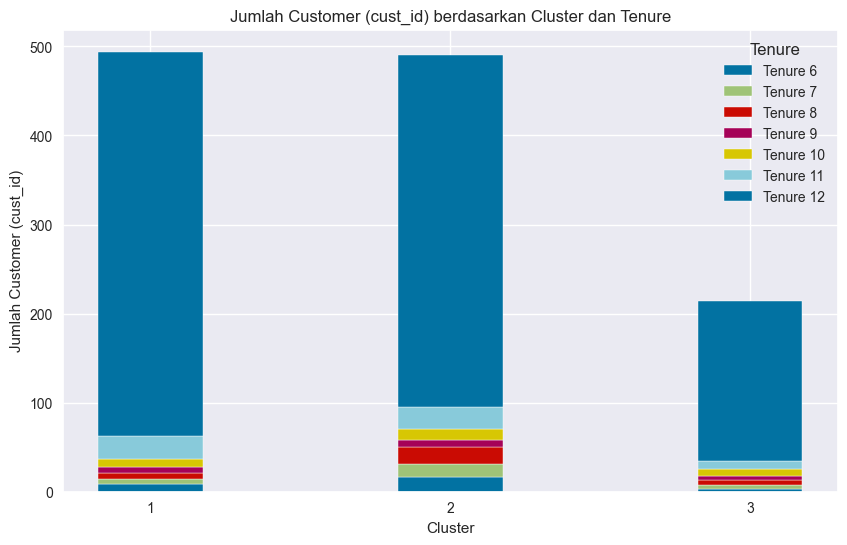

In [46]:
cluster_tenure_counts = df1.groupby(['cluster', 'tenure']).size().unstack(fill_value=0)

# Buat stacked bar chart
clusters = cluster_tenure_counts.index
tenures = cluster_tenure_counts.columns

num_clusters = len(clusters)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

for i, tenure in enumerate(tenures):
    counts = cluster_tenure_counts[tenure].values
    if i == 0:
        bottom = np.zeros(num_clusters)
    else:
        bottom += cluster_tenure_counts[tenures[i - 1]].values
    ax.bar(clusters, counts, width, label=f'Tenure {tenure}', bottom=bottom)

ax.set_xlabel('Cluster')
ax.set_ylabel('Jumlah Customer (cust_id)')
ax.set_title('Jumlah Customer (cust_id) berdasarkan Cluster dan Tenure')
ax.set_xticks(clusters)
ax.legend(title='Tenure', loc='upper right')
plt.show()

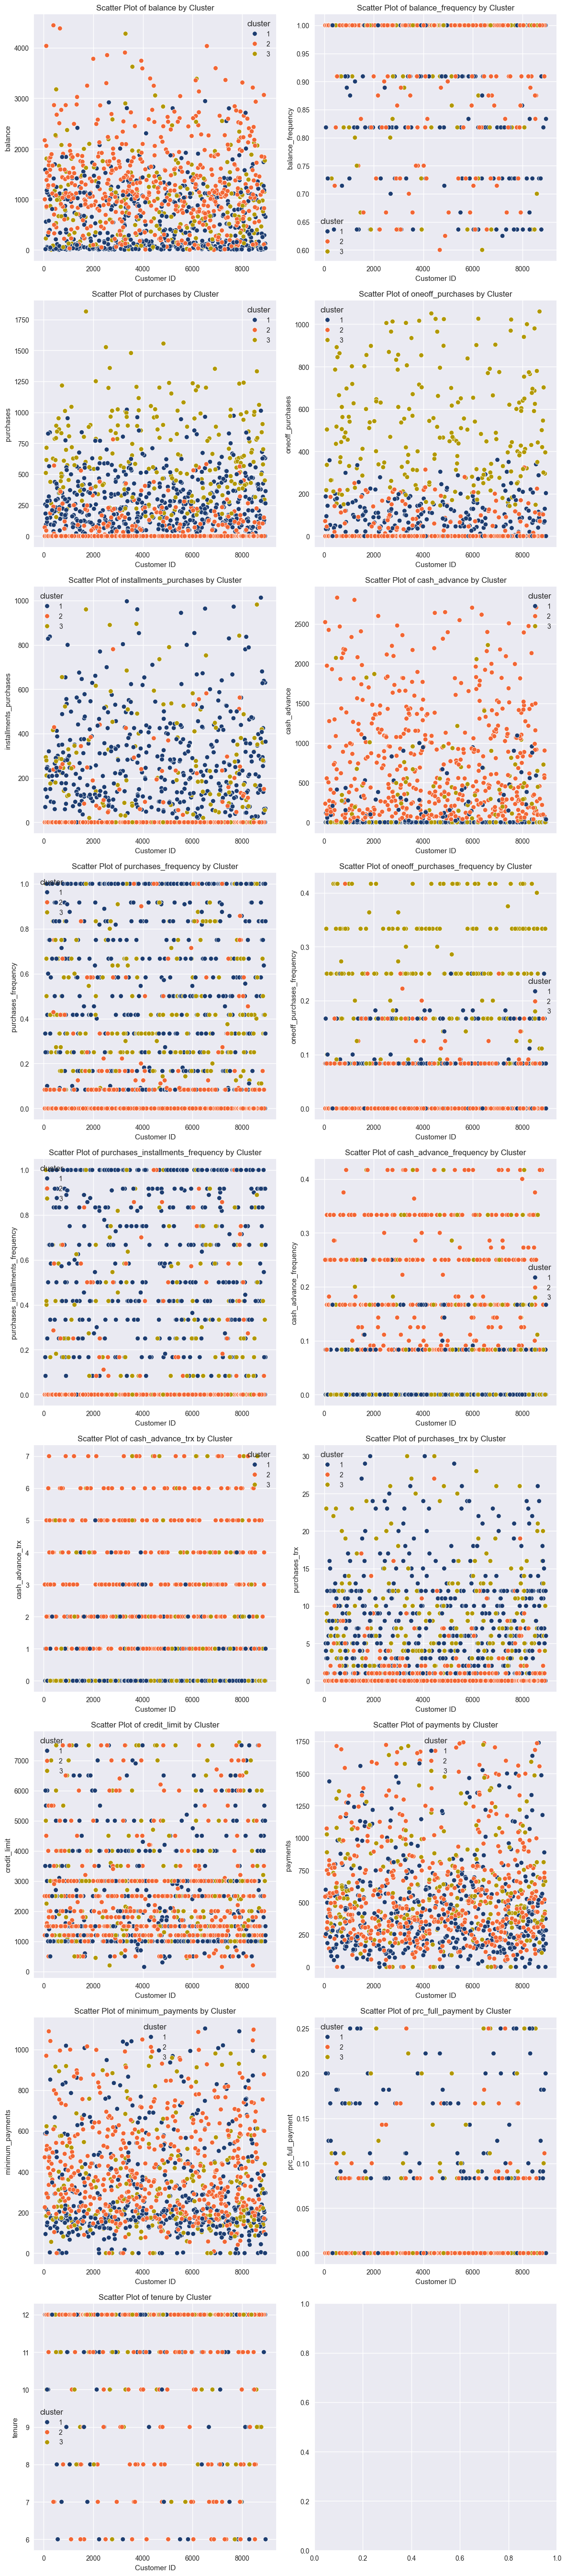

In [47]:
columns_to_plot = df1.columns[(df1.columns != 'cluster') & (df1.columns != 'cust_id')]
num_subplots = len(columns_to_plot)

num_rows = (num_subplots + 1) // 2
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6 * num_rows))

# Iterate directly over subplot axes instead of indices
for i, ax in enumerate(axes.flat):
    if i < num_subplots:  # Ensure we only plot for available columns
        col = columns_to_plot[i]
        sns.scatterplot(data=df1, y=col, x='cust_id', hue='cluster', palette=color_codes, ax=ax)
        ax.set_title(f'Scatter Plot of {col} by Cluster')
        ax.set_xlabel('Customer ID')
        ax.set_ylabel(col)

        # Set legend background to black
        leg = ax.get_legend()
        if leg:
            leg.get_frame().set_facecolor('black')  # Set background color

plt.tight_layout()
plt.show()


## Kesimpulan

### Terkait Data

Dari Chart-Chart di atas:  
- Cluster 1 terlihat mendominasi, lebih besar tipis dari cluster 2.  
- Cluster 3 terbilang niche hanya sekitar 17.9% saja.  
- Semula saya berfikir bahwa model akan mengelompokkan nasabah berdasarkan tenure. Tetapi berdasarkan hasil stacked bar tidak terlihat pola demikian. 
- Saya mengamati pola yang mencolok dari figure terakhir dimana  
- Kolom Balance by Cluster: peringkat dari tinggi ke rendah adah 2, 3, 1  
- Kolom Purchase by Cluster: peringkat dari tinggi ke rendah adah 3, 1, 2  
- Kolom oneoff_purchase by cluster: peringkat dari tinggi ke rendah adah 3, 1&2 tipis  
- Kolom cash advance: peringkat dari tinggi ke rendah adah 2, 3 1  

Kesimpulan Segmentasi:  
- Cluster 1 (Nasabah Jelata) cenderung memiliki saldo lebih rendah, aktif dalam transaksi, melakukan payment satu kali dalam jumlah signifikan, tetapi paling sedikit cash advance.
- Cluster 2 (Nasabah Sultan) memiliki saldo tertinggi, kurang aktif dalam payment, tapi cukup aktif dalam transaksi oneoff dan lebih sering mengambil cash advance dibandingkan cluster 1.
- Cluster 3 (Nasabah Loyal) Cash advance tertinggi dan paling sering mengambil cash advance, sementara saldo berada di tengah-tengah.  
- Perusahaan bisa menggunakan data ini dan menggunakan model yang sudah simpan untuk setiap customer baru. Karena saya sudah mencoba generate data baru di luar dataset yang ada.  


### Terkait Model

- Saya memilih jumlah cluster sebanyak 3 berdasarkan hasil silhouette score yaitu 0.2. Secara angka bukanlah termasuk tertinggi, tetapi secara visualisasi setelah dilakukan beberapa kali percobaan, ini adalah cluster yang paling pas dan tidak saling overlap.  
- Model saya sudah cukup membuat cluster dengan ditemukannya pola-pola dan membentuk segmentasi nasabah.  
- Namun, saya akui model saya masih banyak kurang karena keterbatasan waktu. Terlebih dalam hal analisa, the best part bagi saya. Bagian yang paling saya sukai.  
- Untuk dapat ditingkatkan lagi adalah experiment terhadap scaling dan PCA karena memiliki outliers yang sangat banyak serta data yang tidak terdistribusi merata.  
- Jika saya masih mempunyai waktu saya akan lebih dalam lagi meniliti faktor-faktor outliers.  